In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
%matplotlib inline
matplotlib.style.use('fivethirtyeight')
#plt.rcParams.update({'font.size': 15})
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', -1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':


# Utilitaires pour l'analyse

In [208]:
#Fonction qui fournit des informations comme le nombre de lignes, les données nulles et dupliquées sur un jeu de données

def analyse_checkup(dframe):
    
    #nombre de lignes et colonnes
    nb_lignes = dframe.shape[0]
    nb_colonnes = dframe.shape[1]
    
    #nombre de lignes dupliquées
    duplicates=dframe[dframe.duplicated()]
    nb_duplicates = duplicates.shape[0]
    
    #Les NaN
    percent_nan = (dframe.isna().sum()/dframe.shape[0]).sort_values(ascending=True)
    
    #Intitulés des colonnes
    colonnes_liste = dframe.columns
    
    #Messages d'analyse
    print('Ce jeu de données contient {} lignes et {} colonnes,  {} lignes dupliquées'.format(nb_lignes, nb_colonnes,nb_duplicates))
    print("Taux de non remplissage :  \n{} valeurs vides".format(percent_nan))
    

#Fonction sélectionne les pays dont la valeur d'un indicateur (notamment Internet et Revenu)
#est supérieure à la moyenne.
#Cette fonction retourne un dataframe ou une liste de pays.

def country_select_func(df,avg_2015, operation):
    avg_2015=df["2015"].mean(axis=0)
    dfselect= df[df["2015"]> avg_2015]
    dfselect= dfselect.sort_values(by="2015",ascending=False)
    dfselect["TCAM"] = 100*(pow(dfselect['2015']/dfselect['2011'], 1/5) -1)
    dfselect= dfselect.sort_values(by="TCAM",ascending=False)
    country_list = dfselect["Country Name"].tolist()
    if operation == True :
        return dfselect
    else :
        return country_list

    
    
# Forction qui retourne un dataframe composé unique d'une liste de pays spécifique.
def retrieve_country(df, liste):
    dfr = df[df["Country Name"].isin(liste)]
    return dfr


def fill_nan(df, row, annee, ref):
        for i in annee :
            df.loc[row,annee]= df.loc[row,ref]
                



#Remplissage des années 
def fill_miss_value (df, annee, option):
    for an in annee :
        prec = an - 1
        next = an + 1
        next_ch = str(next)
        prec_ch = str(prec)
        an_ch = str(an)
        if option == "Prec" :
            df[an_ch] = np.where((df[an_ch].isna()), df[prec_ch], df[an_ch])
        if option == "Next" :
            df[an_ch] = np.where((df[an_ch].isna()), df[next_ch], df[an_ch])
    return df


#Calcul du Taux de croissance annuelle moyenne (TCAM)
def calc_TCAM (df, col) : 
    df.loc[:, col] = 100*(pow(df['2016']/df['2011'], 1/6) -1)
    return df[col]


def calc_future (df, coltx, col) :
    df.loc[:, col] = df['2016']*pow((1 + df[coltx]/100), 5)
    return df[col]

#Evolution potentiel de clients
def calc_future_potential (df, coltx, col, annee) :
    exposant= annee-2016
    df.loc[:, col] = df['2016']*pow((1 + df[coltx]/100), exposant)
    return df
# Fonction pour afficher un scatterplot avec distinction de priorité, région, ou autres
def visualise_scatter_by(df, varx, vary, varhue, poids, titre,xlab, ylab, avg) :
    matplotlib.style.use('fivethirtyeight') 
    ax=sns.scatterplot(x=varx, y=vary, hue=varhue, data=df, s=poids)
    plt.title(titre)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.axvline(x=avg, linestyle = 'dotted', color = 'darkgreen')
    

#Fonction qui montre les tendances statistiques (mediane, quantile et outliers par Région)
def visualise_boxplot_by(df, varx, vary, varhue,) :
    sns.set(rc={'figure.figsize':(25,13)}, font_scale=1.5, style='whitegrid')
    sns.boxplot(x=varx, y=vary, data = df,hue=varhue,dodge=False,width=1)

    
#Visualisation graphique du remplissage du dataframe
def visualise_nan(df) :
    plt.figure(figsize=(10,10))
    sns.heatmap(df.isna(),cbar=False)


    

    

# Analyse élémentaire des cinq jeu de données 

#### EdStatsCountry-Series.csv

In [6]:
data_country_series = pd.read_csv("EdStatsCountry-Series.csv")
analyse_checkup(data_country_series)
#Les colonnes CountryCode et SeriesCode pourraient aider à mettre en oeuvre le Dataframe final.

Ce jeu de données contient 613 lignes et 4 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
CountryCode   0.00
SeriesCode    0.00
DESCRIPTION   0.00
Unnamed: 3    1.00
dtype: float64 valeurs vides


In [7]:
data_country_series.head()

CountryCode         SeriesCode  \
0  ABW         SP.POP.TOTL         
1  ABW         SP.POP.GROW         
2  AFG         SP.POP.GROW         
3  AFG         NY.GDP.PCAP.PP.CD   
4  AFG         SP.POP.TOTL         

                                                DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population Prospects nan          
1  Data sources: United Nations World Population Prospects  nan          
2  Data sources: United Nations World Population Prospects  nan          
3  Estimates are based on regression.                       nan          
4  Data sources : United Nations World Population Prospects nan

#### EdStatsCountry.csv

In [8]:
data_country = pd.read_csv("EdStatsCountry.csv")
analyse_checkup(data_country)
#Les colonnes Country Code, Region pourraient aider à mettre en oeuvre le Dataframe final.

Ce jeu de données contient 241 lignes et 32 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Code                                        0.00
Short Name                                          0.00
Table Name                                          0.00
Long Name                                           0.00
WB-2 code                                           0.00
2-alpha code                                        0.01
System of National Accounts                         0.11
Currency Unit                                       0.11
Region                                              0.11
Income Group                                        0.11
Latest population census                            0.12
National accounts base year                         0.15
System of trade                                     0.17
SNA price valuation                                 0.18
Latest trade data                                   0.23
IMF data dissemination standard           

In [9]:
#Nous récupérons les champs qui pourraient aider à la classification par Région
data_country = data_country.loc[:,["Country Code","Region"]]
data_country.head()

Country Code                     Region
0  ABW          Latin America & Caribbean
1  AFG          South Asia               
2  AGO          Sub-Saharan Africa       
3  ALB          Europe & Central Asia    
4  AND          Europe & Central Asia

#### EdStatsFootNote

In [10]:
data_footnote = pd.read_csv("EdStatsFootNote.csv")
analyse_checkup(data_footnote)

Ce jeu de données contient 643638 lignes et 5 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
CountryCode   0.00
SeriesCode    0.00
Year          0.00
DESCRIPTION   0.00
Unnamed: 4    1.00
dtype: float64 valeurs vides


In [11]:
data_footnote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0  ABW         SE.PRE.ENRL.FE  YR2001  Country estimation. nan        
1  ABW         SE.TER.TCHR.FE  YR2005  Country estimation. nan        
2  ABW         SE.PRE.TCHR.FE  YR2000  Country estimation. nan        
3  ABW         SE.SEC.ENRL.GC  YR2004  Country estimation. nan        
4  ABW         SE.PRE.TCHR     YR2006  Country estimation. nan

#### EdStatsSeries

In [12]:
data_series = pd.read_csv("EdStatsSeries.csv")
analyse_checkup(data_series)

Ce jeu de données contient 3665 lignes et 21 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Series Code                           0.00
Topic                                 0.00
Indicator Name                        0.00
Long definition                       0.00
Source                                0.00
Short definition                      0.41
Other notes                           0.85
Base Period                           0.91
Related source links                  0.94
Periodicity                           0.97
Aggregation method                    0.99
Statistical concept and methodology   0.99
Limitations and exceptions            1.00
General comments                      1.00
Development relevance                 1.00
Notes from original source            1.00
License Type                          1.00
Unit of measure                       1.00
Other web links                       1.00
Related indicators                    1.00
Unnamed: 20                         

In [13]:
data_series.head(5)
#Après avoir exploré la page de présentation des indicateurs de la Banque mondiale, 
#il ressort que les colonnes Series Code, Topic, Indicateur Name

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1  BAR.NOED.1519.ZS     Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3  BAR.NOED.15UP.ZS     Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                                           Indicator Name  \
0  Barro-Lee: Percentage of female population age 15-19 with no education   
1  Barro-Lee: Percentage of population age 15-19 with no education          
2  Barro-Lee: Percentage of female population age 15+ with no education     
3  Barro-Lee: Percentage of population age 15+ with no education            
4  Barro-Lee: Percentage of female population age 20-24 with no education   

                                              Short definition  \
0  Percentage of female population age 15-19 with no education   
1  Percentage of population age 15-19 with no education          
2  Percentage of female population age 15+ with no education     
3  Percentage of population age 15+ with no education            
4  Percentage of female population age 20-24 with no education   

                                               Long definition  \
0  Percentage of female population age 15-19 with no education   
1  Percentage of population age 15-19 with no education          
2  Percentage of female population age 15+ with no education     
3  Percentage of population age 15+ with no education            
4  Percentage of female population age 20-24 with no education   

   Unit of measure Periodicity Base Period Other notes Aggregation method  \
0 nan               NaN         NaN         NaN         NaN                 
1 nan               NaN         NaN         NaN         NaN                 
2 nan               NaN         NaN         NaN         NaN                 
3 nan               NaN         NaN         NaN         NaN                 
4 nan               NaN         NaN         NaN         NaN                 

  Limitations and exceptions  Notes from original source General comments  \
0  NaN                       nan                          NaN               
1  NaN                       nan                          NaN               
2  NaN                       nan                          NaN               
3  NaN                       nan                          NaN               
4  NaN                       nan                          NaN               

                                                       Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
1  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
2  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
3  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   
4  Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/   

  Statistical concept and methodology Development relevance  \
0  NaN                                 NaN                    
1  NaN                                 NaN                    
2  NaN                                 NaN                    
3  NaN                                 NaN                    
4  NaN                                 NaN                    

  Related source links  Other web links  Related indicators  License Type  \
0  NaN                 nan              nan                 nan             
1  NaN                 nan              nan                 nan             
2  NaN                 nan              nan                 nan             
3  NaN                 nan              nan                 nan             
4  NaN                 nan              nan                 nan             

   Unnamed: 20  
0 nan           
1 nan           
2 nan           
3 nan           
4 nan

**Choix des premiers indicateurs

In [14]:
#Ce dataframe est celui qui met l'accent sur les indicateurs.
#Il sera utile dans leur choix. Une exploration des topics permet de faire une sélection des indicateurs.
#Nous allons alors réduire la taille du dataframe en vue de choisir les indicateurs importants à notre étude
data_series= data_series.loc[:,["Series Code","Topic","Indicator Name"]]
#On affiche tous les topics(qui sont des regroupements d'indicateurs)
indicator_topic = data_series.Topic.unique().tolist()
indicator_topic

['Attainment',
 'Education Equality',
 'Infrastructure: Communications',
 'Learning Outcomes',
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
 'Economic Policy & Debt: Purchasing power parity',
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
 'Teachers',
 'Education Management Information Systems (SABER)',
 'Early Child Development (SABER)',
 'Engaging the Private Sector (SABER)',
 'School Health and School Feeding (SABER)',
 'School Autonomy and Accountability (SABER)',
 'School Finance (SABER)',
 'Student Assessment (SABER)',
 'Teachers (SABER)',
 'Tertiary Education (SABER)',
 'Workforce Development (SABER)',
 'Literacy',
 'Background',
 'Primary',
 'Secondary',
 'Tertiary',
 'Early Childhood Education',
 'Pre-Primary',
 'Expenditures',
 'Health: Risk factors',
 'Health: Mortality',
 'Social Protection & Labor: Labor f

In [15]:
#Choix du premier indicateur 
#Nous choisissons ici "GDP per capita, PPP (constant 2011 international $)"",  le revenu par habitant en parité de pouvoir d'achat
# Un indicateur très intéressant pour la suite de l'étude. Il est corrélé au pouvoir d'achat des menages.
#Donc à leur capacité à pouvoir acheter des formations en ligne, à s'offrir une connexion internet et à disposer d'un PC
data_series["Indicator Name"][
    data_series.Topic== 'Economic Policy & Debt: Purchasing power parity']

1660    GDP, PPP (current international $)                 
1661    GDP, PPP (constant 2011 international $)           
1664    GDP per capita, PPP (current international $)      
1665    GDP per capita, PPP (constant 2011 international $)
1667    GNI, PPP (current international $)                 
1669    GNI per capita, PPP (current international $)      
Name: Indicator Name, dtype: object

In [16]:
#Choix ici de l'indicateur Internet users (per 100 people)
#Car la procession d'un PC ne garantit pas l'accès à l'internet 
#Internet est l'ingrédient le plus important pour un cours en ligne 
data_series["Indicator Name"][
(data_series.Topic== "Infrastructure: Communications")]

610    Personal computers (per 100 people)
611    Internet users (per 100 people)    
Name: Indicator Name, dtype: object

In [17]:

data_series["Indicator Name"][(data_series.Topic== 'Secondary')&
                          (~data_series["Indicator Name"].str.contains('male')) & 
                          (~data_series["Indicator Name"].str.contains('Male')) & 
                          (~data_series["Indicator Name"].str.contains('primary')) & 
                          (~data_series["Indicator Name"].str.contains('Primary')) & 
                          (~data_series["Indicator Name"].str.contains('non-tertiary')) & 
                          (~data_series["Indicator Name"].str.contains('post-secondary')) & 
                          (~data_series["Indicator Name"].str.contains('Africa'))
                             ]

# A partir des résultats dont nous disposons, nous avons choisi de garder l'indicateur 
#"Enrolment in secondary education, both sexes (number)"


2219    Gross enrolment ratio, secondary, gender parity index (GPI)                                          
2287    Official entrance age to lower secondary education (years)                                           
2290    Lower secondary completion rate, both sexes (%)                                                      
2291    Theoretical duration of secondary education (years)                                                  
2292    Theoretical duration of lower secondary education (years)                                            
2293    Theoretical duration of upper secondary education (years)                                            
2294    Enrolment in secondary education, both sexes (number)                                                
2298    Enrolment in secondary general, both sexes (number)                                                  
2303    Enrolment in secondary vocational, both sexes (number)                                               
2306    Pe

In [18]:
data_series["Indicator Name"][(data_series.Topic== 'Tertiary')&
                          (~data_series["Indicator Name"].str.contains('male')) & 
                          (~data_series["Indicator Name"].str.contains('Male')) & 
                          (~data_series["Indicator Name"].str.contains('primary')) & 
                          (~data_series["Indicator Name"].str.contains('Primary')) & 
                          (~data_series["Indicator Name"].str.contains('non-tertiary')) & 
                          (~data_series["Indicator Name"].str.contains('post-secondary')) & 
                          (~data_series["Indicator Name"].str.contains('Africa'))]

# A partir des résultats dont nous disposons, nous avons choisi de garder l'indicateur 
#'Enrolment in tertiary education, all programmes, both sexes (number)'

2220    Gross enrolment ratio, tertiary, gender parity index (GPI)                                                                            
2331    Gross graduation ratio from first degree programmes (ISCED 6 and 7) in tertiary education, both sexes (%)                             
2332    Enrolment in tertiary education, all programmes, both sexes (number)                                                                  
2335    Gross enrolment ratio, tertiary, both sexes (%)                                                                                       
2338    Graduates from tertiary education, both sexes (number)                                                                                
2340    Percentage of graduates from tertiary education graduating from Agriculture programmes, both sexes (%)                                
2342    Percentage of graduates from tertiary education graduating from Education programmes, both sexes (%)                                  

In [19]:
data_series["Indicator Name"][(data_series.Topic== 'Population')&
                          (~data_series["Indicator Name"].str.contains('male')) & 
                          (~data_series["Indicator Name"].str.contains('Male')) & 
                          (~data_series["Indicator Name"].str.contains('primary')) & 
                          (~data_series["Indicator Name"].str.contains('Primary')) & 
                          (~data_series["Indicator Name"].str.contains('non-tertiary')) & 
                          (~data_series["Indicator Name"].str.contains('post-secondary')) & 
                          (~data_series["Indicator Name"].str.contains('Africa'))]

# A partir des résultats dont nous disposons, nous avons choisi de garder l'indicateur 
#'Population, ages 15-24, total'


2407    Population, ages 3-5, total                                                                
2410    Population, ages 4-6, total                                                                
2413    Population, ages 5-9, total                                                                
2416    Population, ages 5-10, total                                                               
2419    Population, ages 5-11, total                                                               
2422    Population, ages 6-9, total                                                                
2425    Population, ages 6-10, total                                                               
2428    Population, ages 6-11, total                                                               
2431    Population, ages 6-12, total                                                               
2434    Population, ages 7-9, total                                                                


In [20]:
#Création d'un tableau pour les target_indicator 
target_indicator =["GDP per capita, PPP (constant 2011 international $)",
                   "Internet users (per 100 people)",
                   "Enrolment in tertiary education, all programmes, both sexes (number)",
                   'Population, ages 15-24, total',
                   "Enrolment in secondary education, both sexes (number)"]


#### EdStatsData

In [21]:
data_stats_by_country = pd.read_csv("EdStatsData.csv")

In [22]:
analyse_checkup(data_stats_by_country)

#Ce Dataframe semble contenir les informations dont nous avons besoin.
#Nous choisissons de contenuer l'analyse avec ce jeu de données.
#les autres dataframes seront solllicités au besoin au cours de notre analyse.

Ce jeu de données contient 886930 lignes et 70 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
Indicator Code   0.00
2010             0.73
2005             0.79
2000             0.80
2012             0.83
2011             0.84
2009             0.84
2006             0.84
2013             0.84
2007             0.85
2008             0.85
1995             0.85
2015             0.85
2003             0.85
2004             0.85
1990             0.86
2002             0.86
2001             0.86
1999             0.87
2014             0.87
1985             0.90
1980             0.90
1975             0.90
1998             0.90
1994             0.91
1996             0.91
1993             0.91
1992             0.91
1991             0.92
1997             0.92
1970             0.92
2040             0.94
2025             0.94
2090             0.94
2030             0.94
2035             0.94
2080             0.94
2055          

In [23]:
#Je recupère ce dataframe dans une autre variable, histoire de revenir en arrière au besoin
df=data_stats_by_country.copy()

In [24]:
#Nous allons nous concentrer sur les pays. Donc nettoyer les régions dans un premier temps 
#Et y revenir en créant une colonne pour elles dans un second temps 
df['Country Name'].unique().tolist()

['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'World',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Berm

In [25]:
#Créons donc à la main une liste de ces country(Region)
#Constitution d'un tableau pour récupérer la liste des Country Name (Région) à Supprimer 
zone_areas = ['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'World']

In [26]:
#Une fois constituées, supprimons ces régions 
#Le Dataframe df suivant est désormais sans les régions 
df = df[(~df["Country Name"].isin(zone_areas))]
analyse_checkup(df)

Ce jeu de données contient 795305 lignes et 70 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
Indicator Code   0.00
2010             0.71
2005             0.78
2000             0.79
2012             0.83
2011             0.83
2009             0.83
2006             0.83
2015             0.84
2007             0.84
2013             0.84
2008             0.84
1995             0.84
2003             0.85
2004             0.85
1990             0.85
2002             0.85
2001             0.86
1999             0.86
2014             0.87
1985             0.89
1980             0.89
1975             0.90
1998             0.90
1994             0.91
1996             0.91
1993             0.91
1992             0.91
1991             0.91
1970             0.91
1997             0.92
2035             0.94
2030             0.94
2025             0.94
2020             0.94
2040             0.94
2085             0.94
2050          

In [27]:
#Suppression  des indicateurs peu utiles à l'étude 
#L'objectif est d'avoir un dataset souple à manipuler et rapide au traitement
df_target = df[
                     (df["Indicator Name"].isin(target_indicator)) & 
                    (~df["Indicator Name"].str.contains('male')) & 
                    (~df["Indicator Name"].str.contains('Male')) & 
                    (~df["Indicator Name"].str.contains('primary')) & 
                    (~df["Indicator Name"].str.contains('Primary')) & 
                    (~df["Indicator Name"].str.contains('non-tertiary')) & 
                    (~df["Indicator Name"].str.contains('post-secondary')) 
                ]
analyse_checkup(df_target)

Ce jeu de données contient 1085 lignes et 70 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
Indicator Code   0.00
2011             0.19
2004             0.20
2005             0.20
2010             0.20
2002             0.20
2009             0.20
2008             0.21
2012             0.21
2007             0.21
2003             0.21
1999             0.21
2006             0.22
2001             0.22
2000             0.22
2013             0.22
2014             0.23
1990             0.26
2015             0.26
1996             0.31
1998             0.32
1995             0.33
1997             0.34
1994             0.38
1993             0.40
1992             0.40
1991             0.41
2016             0.63
1981             0.73
1986             0.74
1971             0.75
1984             0.75
1980             0.75
1982             0.76
1976             0.76
1985             0.76
1983             0.76
1979            

In [28]:
#Fusionner les deux dataframes qui intéressent notre analyse
#Utile pour ajouter la colonne région.
data_merge = pd.merge(df_target,data_country, how = "left", on = "Country Code")
data_merge = data_merge.drop(columns=['Unnamed: 69'])
data_merge.head(2)

Country Name Country Code  \
0  Afghanistan  AFG           
1  Afghanistan  AFG           

                                                         Indicator Name  \
0  Enrolment in secondary education, both sexes (number)                  
1  Enrolment in tertiary education, all programmes, both sexes (number)   

  Indicator Code       1970       1971       1972       1973       1974  \
0  SE.SEC.ENRL   116,174.00 134,069.00 153,060.00 165,346.00 172,797.00   
1  SE.TER.ENRL   7,732.00   9,409.00   9,817.00   11,487.00  10,956.00    

        1975       1976       1977       1978      1979       1980       1981  \
0 185,723.00 204,889.00 223,379.00 238,674.00 nan       293,308.00 332,935.00   
1 12,256.00  14,214.00  16,147.00  21,118.00  22,974.00 nan        nan          

        1982  1983       1984       1985       1986      1987       1988  \
0 178,423.00 nan   198,337.00 206,381.00 187,745.00 nan       205,392.00   
1 19,652.00  nan   nan        nan        22,306.00  17,509.00 nan          

        1989       1990       1991  1992       1993       1994       1995  \
0 202,572.00 182,340.00 281,928.00 nan   332,170.00 497,762.00 512,851.00   
1 nan        24,333.00  nan        nan   nan        nan        nan          

   1996  1997  1998  1999  2000       2001  2002       2003       2004  \
0 nan   nan   nan   nan   nan   362,415.00 nan   406,895.00 594,306.00   
1 nan   nan   nan   nan   nan   nan        nan   26,211.00  27,648.00    

        2005         2006         2007         2008         2009         2010  \
0 651,453.00 1,006,841.00 1,035,782.00 1,425,009.00 1,716,190.00 2,044,157.00   
1 nan        nan          nan          nan          95,185.00    nan            

          2011         2012         2013         2014         2015  2016  \
0 2,208,963.00 2,415,884.00 2,538,420.00 2,602,734.00 2,698,816.00 nan     
1 97,504.00    nan          nan          262,874.00   nan          nan     

   2017  2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  \
0 nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan     
1 nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan     

   2075  2080  2085  2090  2095  2100      Region  
0 nan   nan   nan   nan   nan   nan    South Asia  
1 nan   nan   nan   nan   nan   nan    South Asia

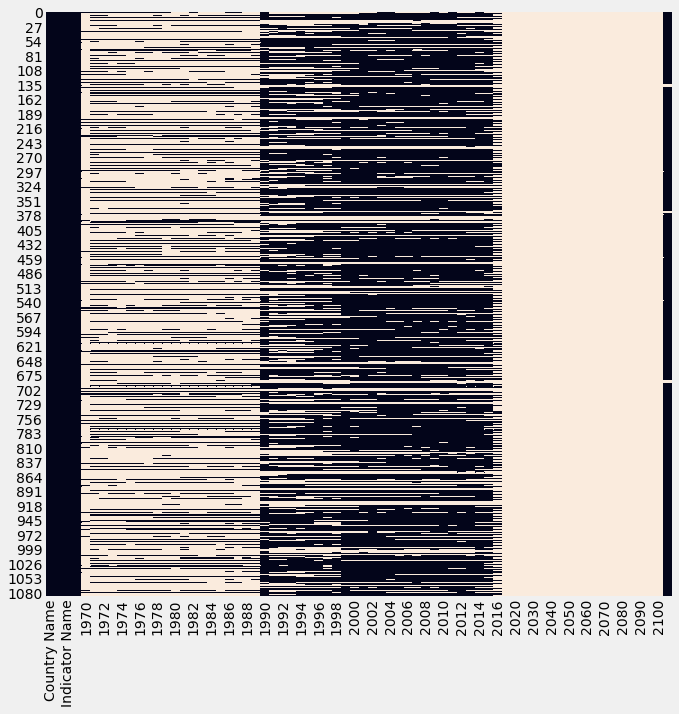

In [29]:
#Visualisation graphique du remplissage du dataframe
visualise_nan(data_merge)
#Cette visualisation montre clairement que de 2017 à 2100, les colonnes pratiquement vides.

In [30]:
#Quel est le taux de remplissage de ce dataframe
(data_merge.isna().sum()/data_merge.shape[0]).sort_values(ascending=True)

Country Name     0.00
Country Code     0.00
Indicator Name   0.00
Indicator Code   0.00
Region           0.01
2011             0.19
2004             0.20
2005             0.20
2010             0.20
2009             0.20
2002             0.20
2012             0.21
2008             0.21
2007             0.21
2003             0.21
1999             0.21
2006             0.22
2001             0.22
2000             0.22
2013             0.22
2014             0.23
1990             0.26
2015             0.26
1996             0.31
1998             0.32
1995             0.33
1997             0.34
1994             0.38
1993             0.40
1992             0.40
1991             0.41
2016             0.63
1981             0.73
1986             0.74
1971             0.75
1984             0.75
1980             0.75
1982             0.76
1976             0.76
1985             0.76
1983             0.76
1979             0.76
1972             0.76
1989             0.76
1977             0.76
1987      

In [31]:
#Réduction du dataframe aux colonnes les plus remplies 
data_merge= data_merge[data_merge.columns[data_merge.isna().sum()/data_merge.shape[0]<0.90]]
data_merge.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', 'Region'],
      dtype='object')

### Création de data_master 

In [32]:
#Suppression des anciennes années 1971 : 2010
#Nous gardons ainsi les années 2011 : 2016 pour la suite 
data_master= data_merge.drop(data_merge.loc[:,"1971" :"2009"], axis=1)
data_master= data_master.drop(columns=['Indicator Code'])
analyse_checkup(data_master)

Ce jeu de données contient 1085 lignes et 11 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
Region           0.01
2011             0.19
2010             0.20
2012             0.21
2013             0.22
2014             0.23
2015             0.26
2016             0.63
dtype: float64 valeurs vides


In [33]:
#suppression des lignes ne comportant que des Nan pour les années
data_master=data_master.dropna(subset=['2010','2011', '2012','2013','2014','2015','2016'], how= 'all')
analyse_checkup(data_master)

Ce jeu de données contient 933 lignes et 11 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
Region           0.00
2011             0.06
2010             0.07
2012             0.08
2013             0.10
2014             0.11
2015             0.14
2016             0.57
dtype: float64 valeurs vides


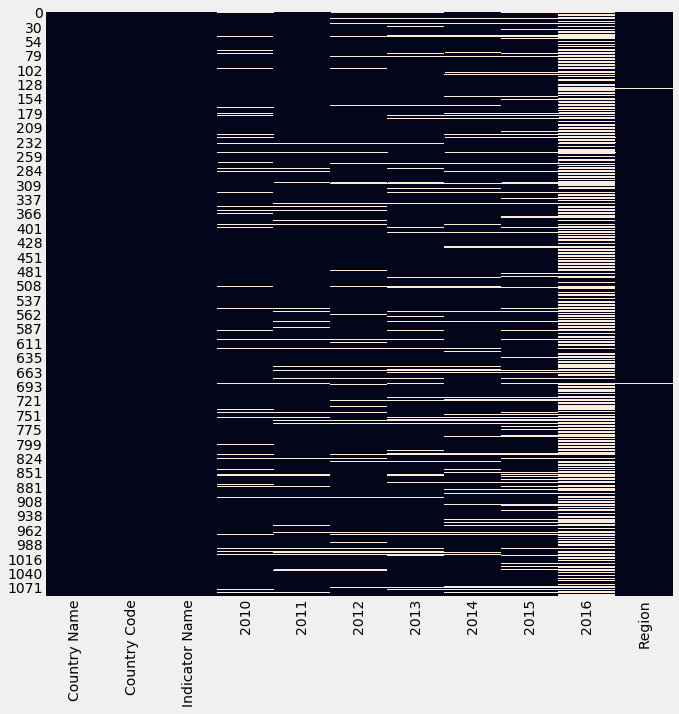

In [34]:
#Visualisation graphique du remplissage du dataframe
visualise_nan(data_master)

In [35]:
#récupération des pays ne présentant pas que des valeurs na pour toutes les années
dico = data_master["Country Name"].value_counts().to_dict()
liste_pays = []
for k,v in dico.items(): 
    if v==5 :
        liste_pays.append(k)
len(liste_pays)

144

In [36]:
data_master = data_master[data_master["Country Name"].isin(liste_pays)]
analyse_checkup(data_master)
#data_master contient désormais 720 lignes (soit 144 pays à étudier X 5)
#De plus, chaque pays a au moins de données pour une année selon l'indicateur

Ce jeu de données contient 720 lignes et 11 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
Region           0.00
2011             0.05
2010             0.06
2012             0.07
2013             0.07
2014             0.09
2015             0.14
2016             0.59
dtype: float64 valeurs vides


#### Remplissage des Nan de Data_master

In [37]:
analyse_checkup(data_master)

Ce jeu de données contient 720 lignes et 11 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
Region           0.00
2011             0.05
2010             0.06
2012             0.07
2013             0.07
2014             0.09
2015             0.14
2016             0.59
dtype: float64 valeurs vides


In [38]:
#Remplir les Nan de l'année n  avec les données non nulles de n-1
data_master["2011"] = np.where((data_master["2011"].isna()), data_master["2010"], data_master["2011"])
data_master["2012"] = np.where((data_master["2012"].isna()), data_master["2011"], data_master["2012"])
data_master["2013"] = np.where((data_master["2013"].isna()), data_master["2012"], data_master["2013"])
data_master["2014"] = np.where((data_master["2014"].isna()), data_master["2013"], data_master["2014"])
data_master["2015"] = np.where((data_master["2015"].isna()), data_master["2014"], data_master["2015"])
data_master["2016"] = np.where((data_master["2016"].isna()), data_master["2015"], data_master["2016"])

analyse_checkup(data_master)


Ce jeu de données contient 720 lignes et 11 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
2015             0.00
2016             0.00
Region           0.00
2014             0.00
2013             0.01
2012             0.02
2011             0.03
2010             0.06
dtype: float64 valeurs vides


In [39]:
#Remplir les Nan restants de l'année n  avec les données non nulles de n+1
data_master["2013"] = np.where((data_master["2013"].isna()), data_master["2014"], data_master["2013"])
data_master["2012"] = np.where((data_master["2012"].isna()), data_master["2013"], data_master["2012"])
data_master["2011"] = np.where((data_master["2011"].isna()), data_master["2012"], data_master["2011"])

analyse_checkup(data_master)


Ce jeu de données contient 720 lignes et 11 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
2015             0.00
2016             0.00
Region           0.00
2011             0.00
2012             0.00
2013             0.00
2014             0.00
2010             0.06
dtype: float64 valeurs vides


In [40]:
data_master.drop(columns=["2010"], inplace=True)
analyse_checkup(data_master)

Ce jeu de données contient 720 lignes et 10 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
2015             0.00
2016             0.00
Region           0.00
2011             0.00
2012             0.00
2013             0.00
2014             0.00
dtype: float64 valeurs vides


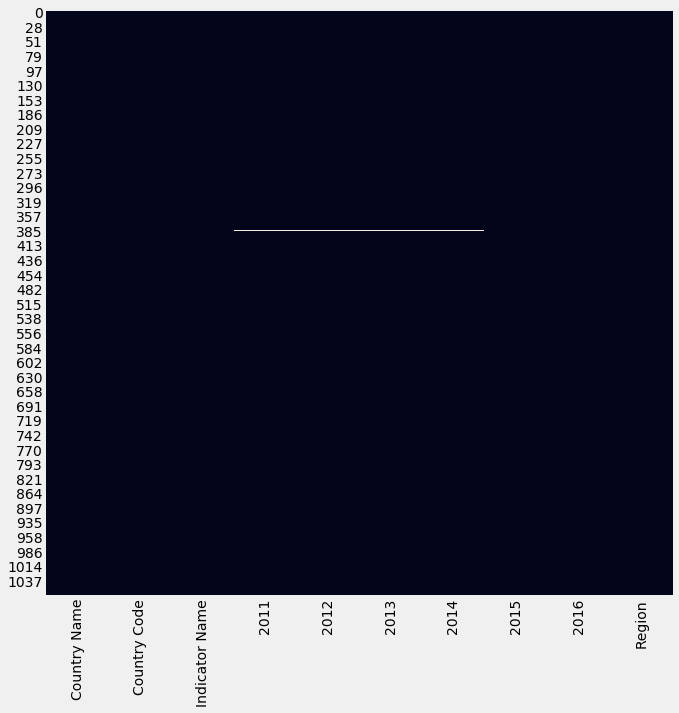

In [41]:
#Visualisation graphique du remplissage du dataframe
visualise_nan(data_master)

In [42]:
# Deux pays ont gardé des données nans pour 2011: 2014
#On vérifie les pays concernés 
t = data_master[data_master["2014"].isna()]


In [43]:
#On les remplit avec les données de 2015
data_master["2011"] = np.where((data_master["2011"].isna()), data_master["2015"], data_master["2011"])
data_master["2012"] = np.where((data_master["2012"].isna()), data_master["2015"], data_master["2012"])
data_master["2013"] = np.where((data_master["2013"].isna()), data_master["2015"], data_master["2013"])
data_master["2014"] = np.where((data_master["2014"].isna()), data_master["2015"], data_master["2014"])


In [44]:
t = data_master[data_master["2014"].isna()]
t

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, 2011, 2012, 2013, 2014, 2015, 2016, Region]
Index: []

In [45]:
r = data_master[data_master["Region"].isna()]
r

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, 2011, 2012, 2013, 2014, 2015, 2016, Region]
Index: []

# Sélection des pays Indicateur par indicateur

In [46]:
#Regroupement des pays par Indicateur
g = data_master.groupby(["Indicator Name"])

###  Indicateur lié au principal input pour les ed-techs : le taux d'accès à Internet

In [47]:
#Groupage par indicateur : Internet users (per 100 people)
data_internet = g.get_group("Internet users (per 100 people)")
#Notre priorité est de sélectionner les pays ayant un taux supérieur à la médiane mondiale.
internet_avg_2016= data_internet.loc[:,"2016"].median(axis=0)
#création d'une colonne TCAM et Calcul du taux de croissance annuel moyen 
#qui reflète la progression des pays sur 2011 : 2016
Tcam_internet = calc_TCAM(data_internet,"TCAM_Internet_2016")
internet_Tcam_avg = Tcam_internet.median(axis=0)
analyse_checkup(data_internet)


Ce jeu de données contient 144 lignes et 11 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name         0.00
Country Code         0.00
Indicator Name       0.00
2011                 0.00
2012                 0.00
2013                 0.00
2014                 0.00
2015                 0.00
2016                 0.00
Region               0.00
TCAM_Internet_2016   0.00
dtype: float64 valeurs vides


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


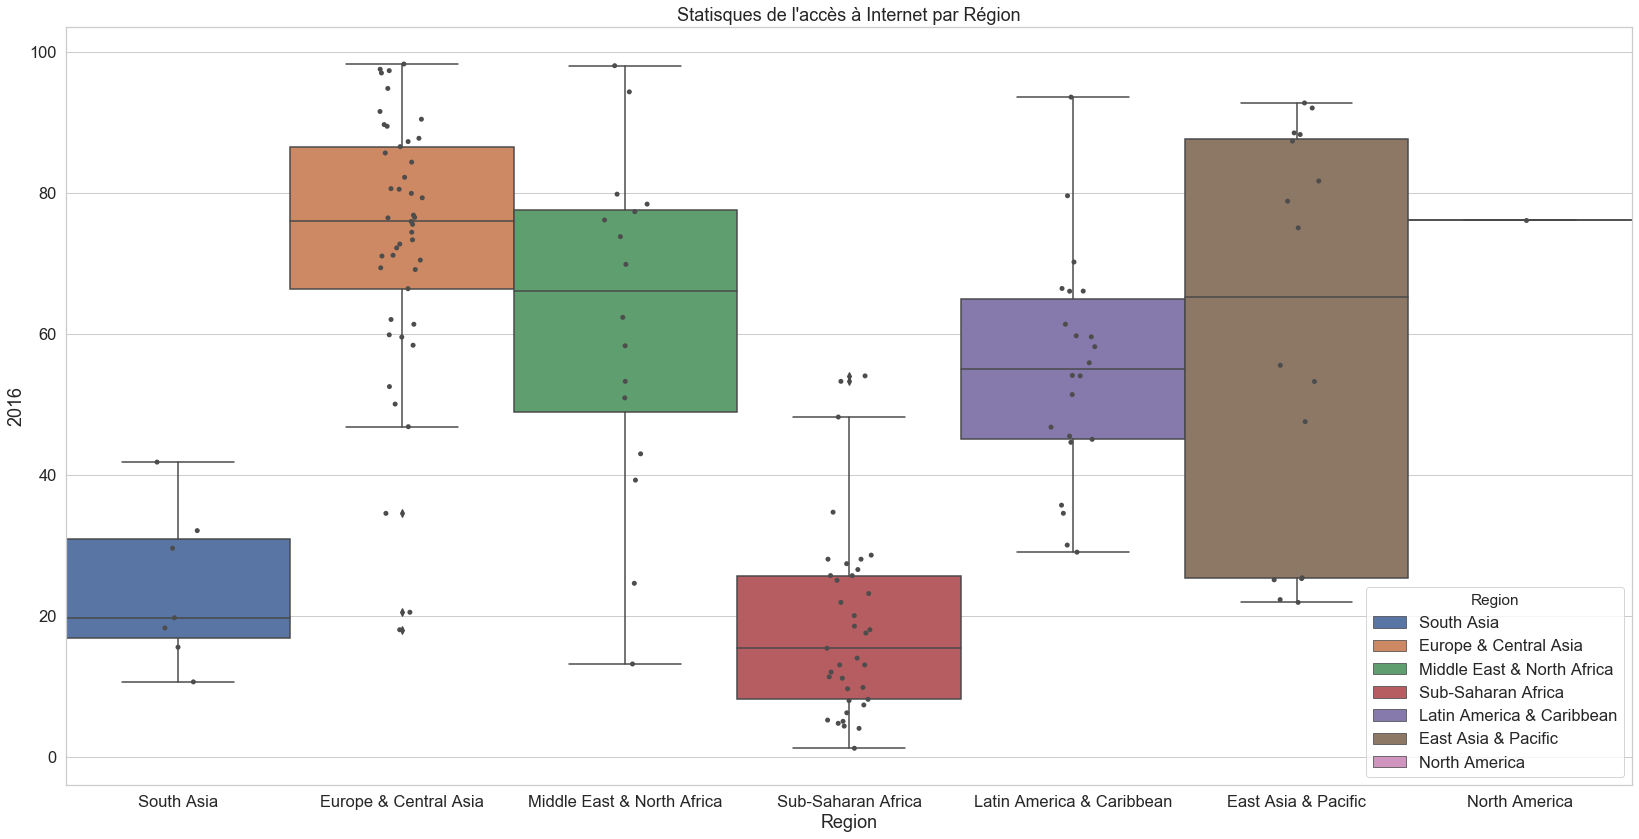

In [66]:
sns.set(rc={'figure.figsize':(25,13)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x="Region", y='2016', data = data_internet,hue="Region",dodge=False,width=1)
sns.stripplot(x="Region", y="2016", data=data_internet, color=".3")
plt.title("Statisques de l'accès à Internet par Région")
plt.savefig('InternetStatsbyRegion.png')

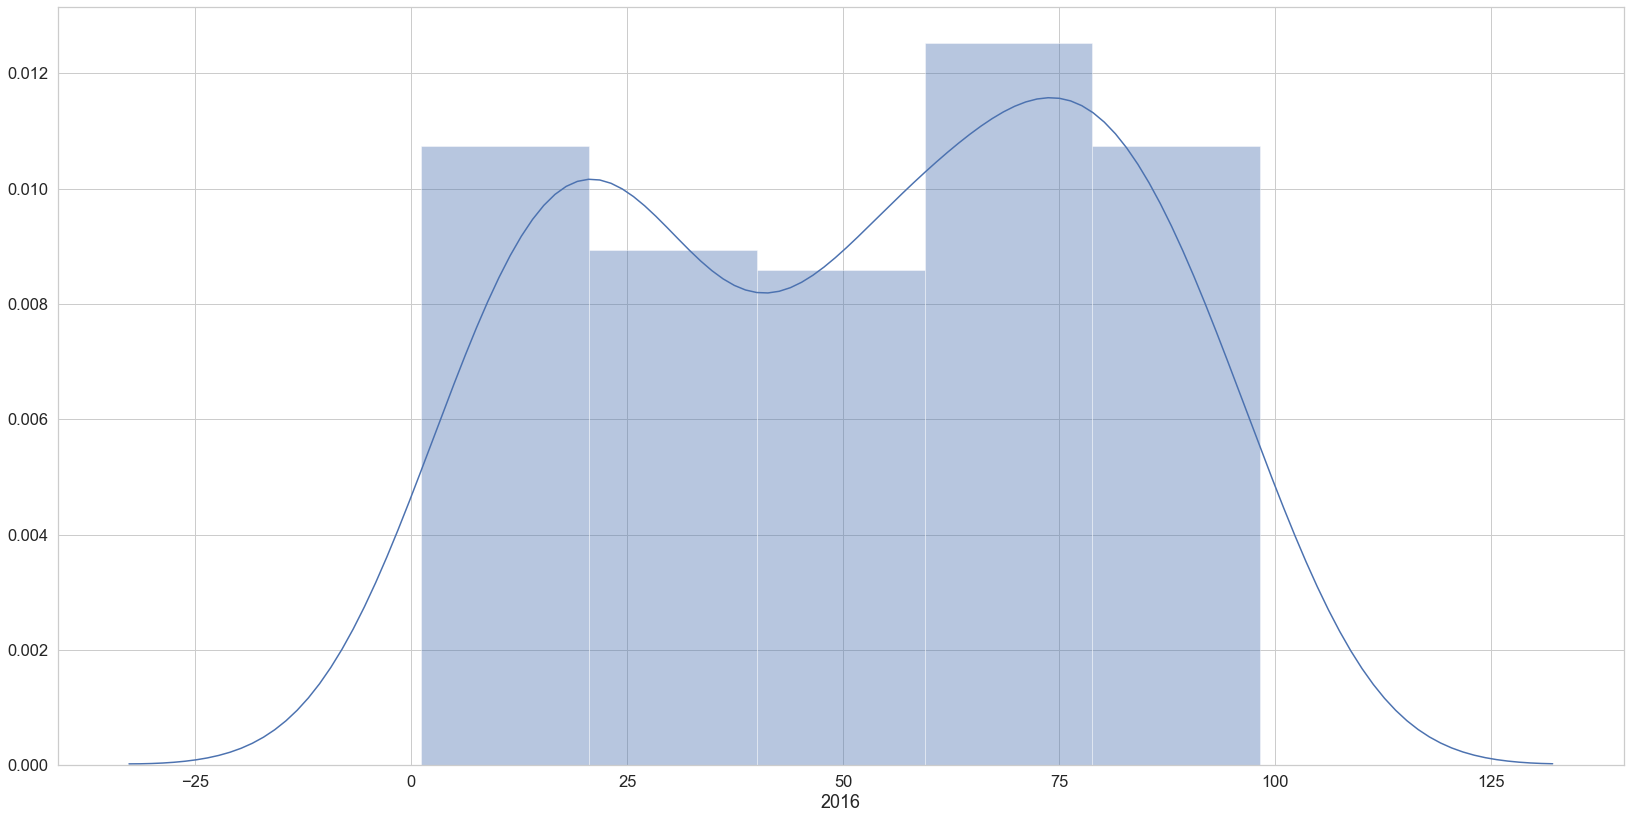

In [49]:
sns.distplot(data_internet['2016'])

### Distribution Internet 

Text(85, 35, 'Priority 1\nCountries')

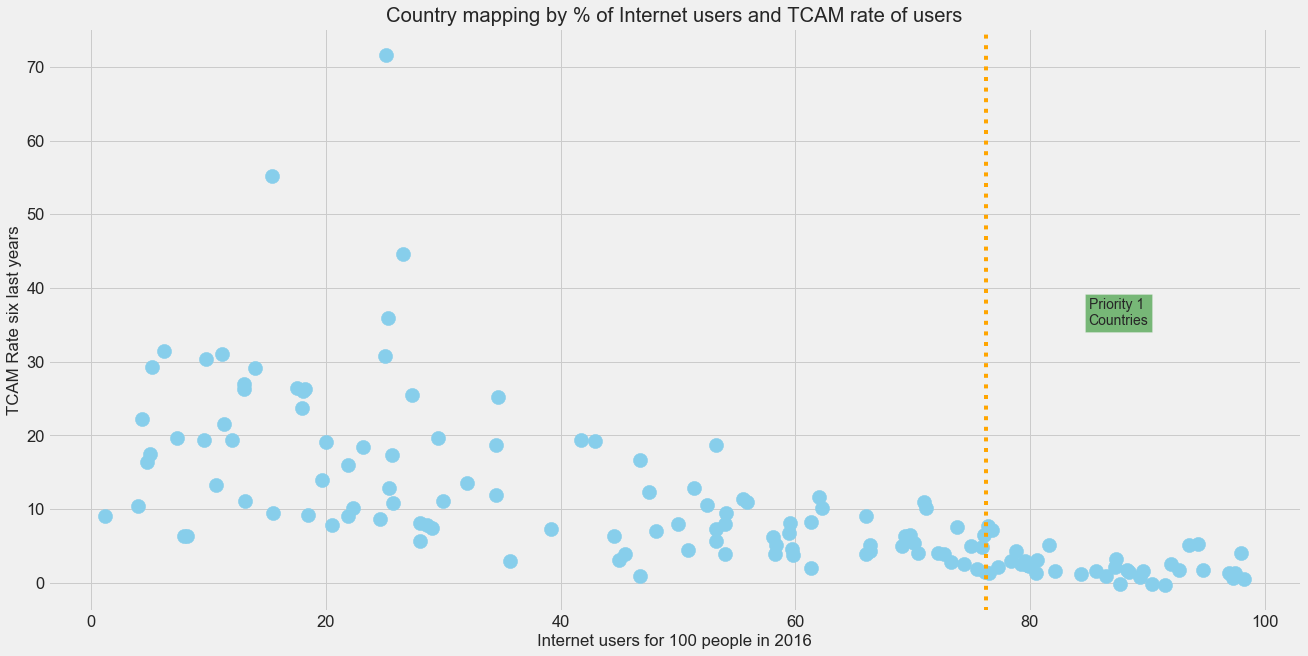

In [50]:
matplotlib.style.use('fivethirtyeight') 
data_internet.plot(kind='scatter', x='2016', y='TCAM_Internet_2016', figsize=(20, 10), color='skyblue', s= 200)
plt.title('Country mapping by % of Internet users and TCAM rate of users')
plt.xlabel('Internet users for 100 people in 2016')
plt.ylabel('TCAM Rate six last years')
plt.axvline(x=data_internet["2016"].quantile(0.75), linestyle = 'dotted', color = 'orange')
plt.text(85, 35, "Priority 1\nCountries", bbox=dict(facecolor='green', alpha=0.5))


In [51]:
#Choix des pays susceptibles d'atteindre 50% d'accès à internet dans 5 anns
#La fonction Calc_future faire une projetction sur les cinq prochaines années sur la base du TCAM du pays
last_choice = calc_future (data_internet, "TCAM_Internet_2016", "Project_internet")
master_internet = data_internet[data_internet["Project_internet"]>50]
analyse_checkup(master_internet)
#ainsi 108 pays devraient repondre au critère des 50% à l'horizon 2020 

Ce jeu de données contient 108 lignes et 12 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name         0.00
Country Code         0.00
Indicator Name       0.00
2011                 0.00
2012                 0.00
2013                 0.00
2014                 0.00
2015                 0.00
2016                 0.00
Region               0.00
TCAM_Internet_2016   0.00
Project_internet     0.00
dtype: float64 valeurs vides


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [52]:
#Les pays ayant un taux d'accès supérieur à la 3e quantile (25% des pays au Top) : Priorité 1
#Les autres Priorité 2
master_internet["Priority_Internet"] = np.where((master_internet["2016"]>data_internet["2016"].quantile(0.75)),1,2)
master_internet["Priority_Internet"].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2    72
1    36
Name: Priority_Internet, dtype: int64

Text(0.5, 1.1, 'Repartition des pays par priorité')

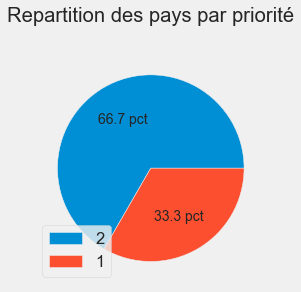

In [67]:
matplotlib.style.use('fivethirtyeight')
plt.figure(figsize = (4, 4))
plt.pie(master_internet["Priority_Internet"].value_counts(), autopct="%1.1f pct")
plt.legend(labels=master_internet["Priority_Internet"].value_counts().index, loc='lower left')
plt.title('Repartition des pays par priorité', y=1.1) 

Text(85, 35, 'Priority 1\nCountries')

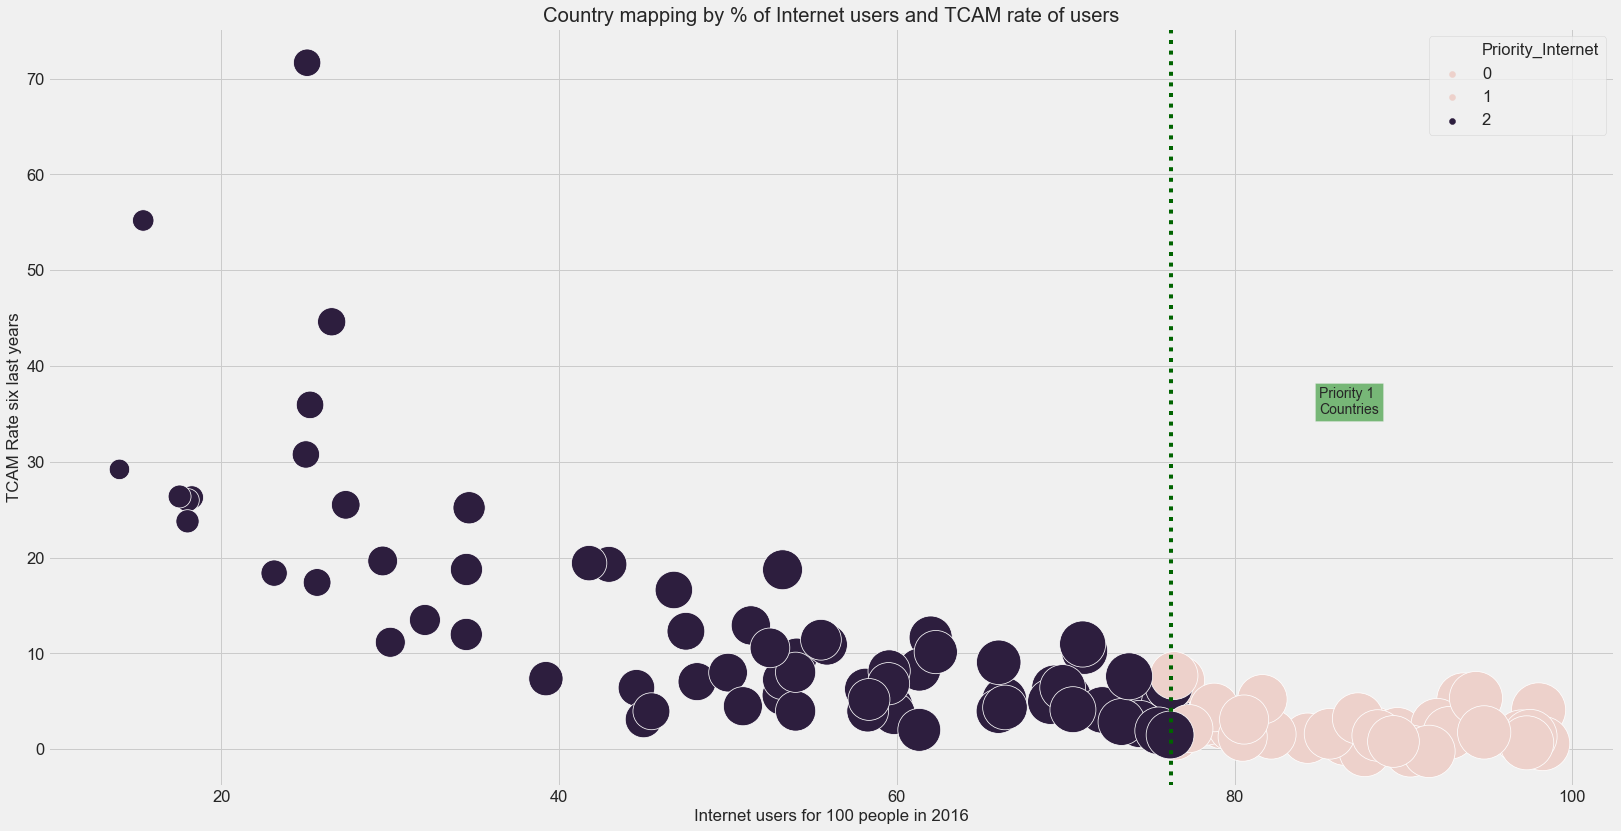

In [56]:
matplotlib.style.use('fivethirtyeight')
poids = master_internet["2016"]*30
titre ='Country mapping by % of Internet users and TCAM rate of users'
xlab = 'Internet users for 100 people in 2016'
ylab = 'TCAM Rate six last years'
avg = data_internet["2016"].quantile(0.75)
visualise_scatter_by(master_internet, '2016', 'TCAM_Internet_2016', "Priority_Internet", poids, titre,xlab, ylab, avg)
plt.text(85, 35, "Priority 1\nCountries", bbox=dict(facecolor='green', alpha=0.5))

Text(85, 35, 'Priority 1\nCountries')

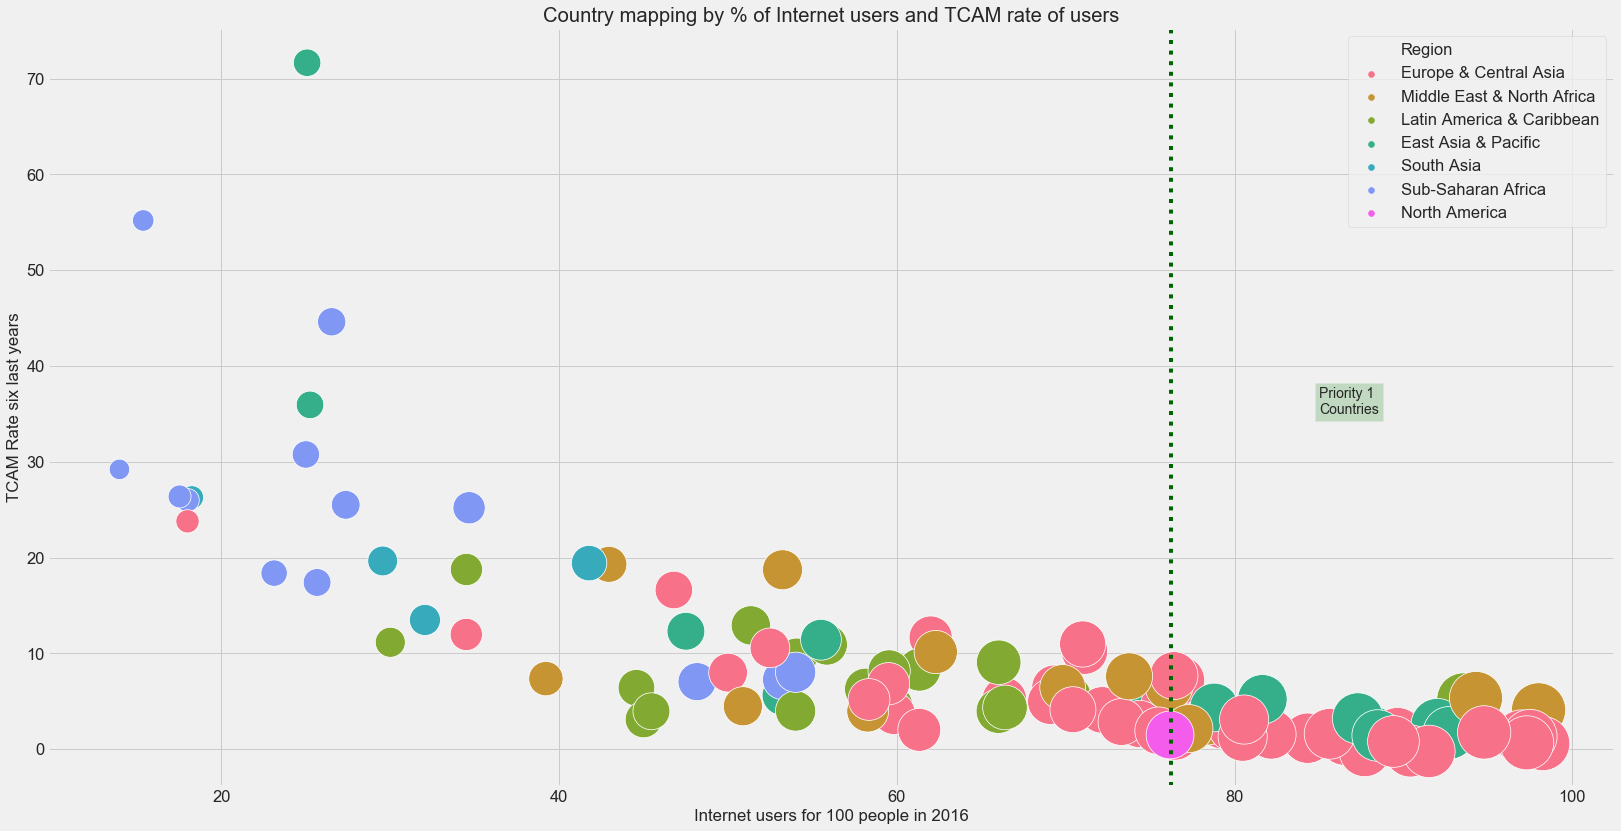

In [55]:
poids = master_internet["2016"]*30
titre ='Country mapping by % of Internet users and TCAM rate of users'
xlab = 'Internet users for 100 people in 2016'
ylab = 'TCAM Rate six last years'
avg = data_internet["2016"].quantile(0.75)
visualise_scatter_by(master_internet, '2016', 'TCAM_Internet_2016', "Region", poids, titre,xlab, ylab, avg)
plt.text(85, 35, "Priority 1\nCountries", bbox=dict(facecolor='green', alpha=0.2))


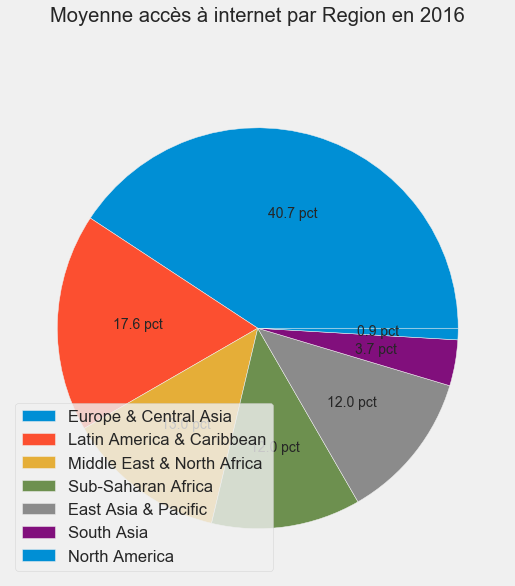

In [58]:
region_internet =master_internet["Region"].value_counts()
plt.figure(figsize = (8, 10))
plt.pie(region_internet,
        autopct="%1.1f pct")
plt.legend(labels=region_internet.index, loc='lower left')
plt.title('Moyenne accès à internet par Region en 2016', y=1.1)  
plt.savefig('InternetByRegion.png')

In [59]:
country_list_internet = master_internet["Country Name"].tolist()
len(country_list_internet)

108

# Revenu par habitant

In [60]:
data_revenu = g.get_group("GDP per capita, PPP (constant 2011 international $)")
analyse_checkup(data_revenu)

Ce jeu de données contient 144 lignes et 10 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
2011             0.00
2012             0.00
2013             0.00
2014             0.00
2015             0.00
2016             0.00
Region           0.00
dtype: float64 valeurs vides


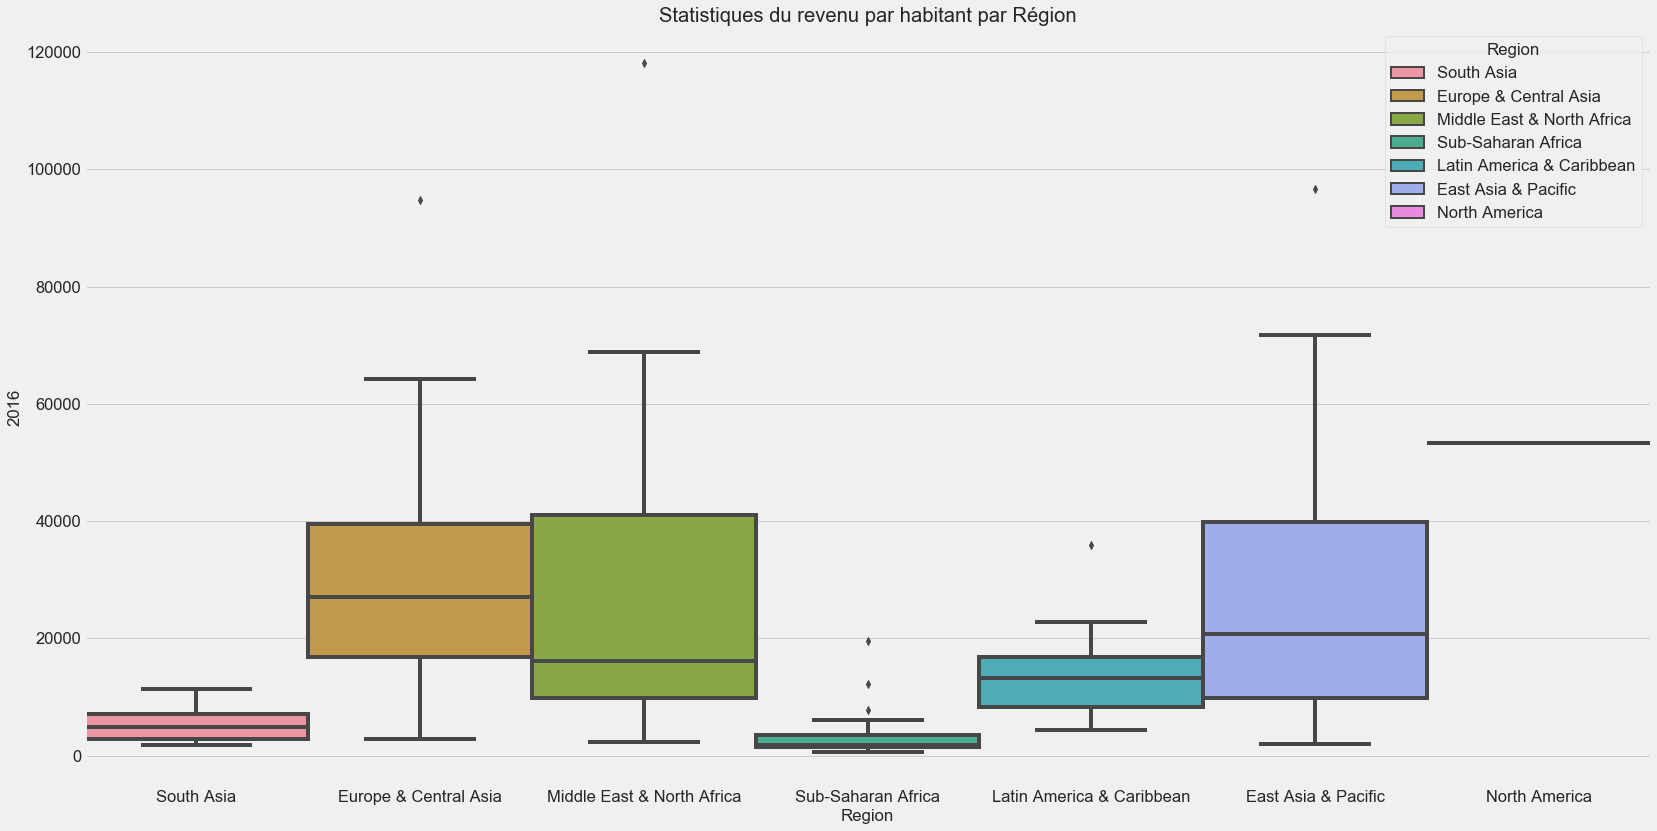

In [68]:
#sns.set(rc={'figure.figsize':(25,13)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x="Region", y='2016', data = data_revenu,hue="Region",dodge=False,width=1)
plt.title("Statistiques du revenu par habitant par Région")
plt.savefig('RevenuStatsByRegion.png')

In [71]:
revenu_avg_2016 = data_revenu.loc[:,"2016"].median(axis=0)
#création d'une colonne TCAM et Calcul du taux de croissance annuel moyen 
#qui reflète la progression des pays sur les années 2011 : 2016
Tcam_revenu = calc_TCAM(data_revenu,"TCAM_Revenu_2016")
revenu_Tcam_avg = Tcam_revenu.median(axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [72]:
revenu_master = data_revenu[data_revenu["Country Name"].isin(country_list_internet)]
analyse_checkup(revenu_master)

Ce jeu de données contient 108 lignes et 11 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name       0.00
Country Code       0.00
Indicator Name     0.00
2011               0.00
2012               0.00
2013               0.00
2014               0.00
2015               0.00
2016               0.00
Region             0.00
TCAM_Revenu_2016   0.00
dtype: float64 valeurs vides


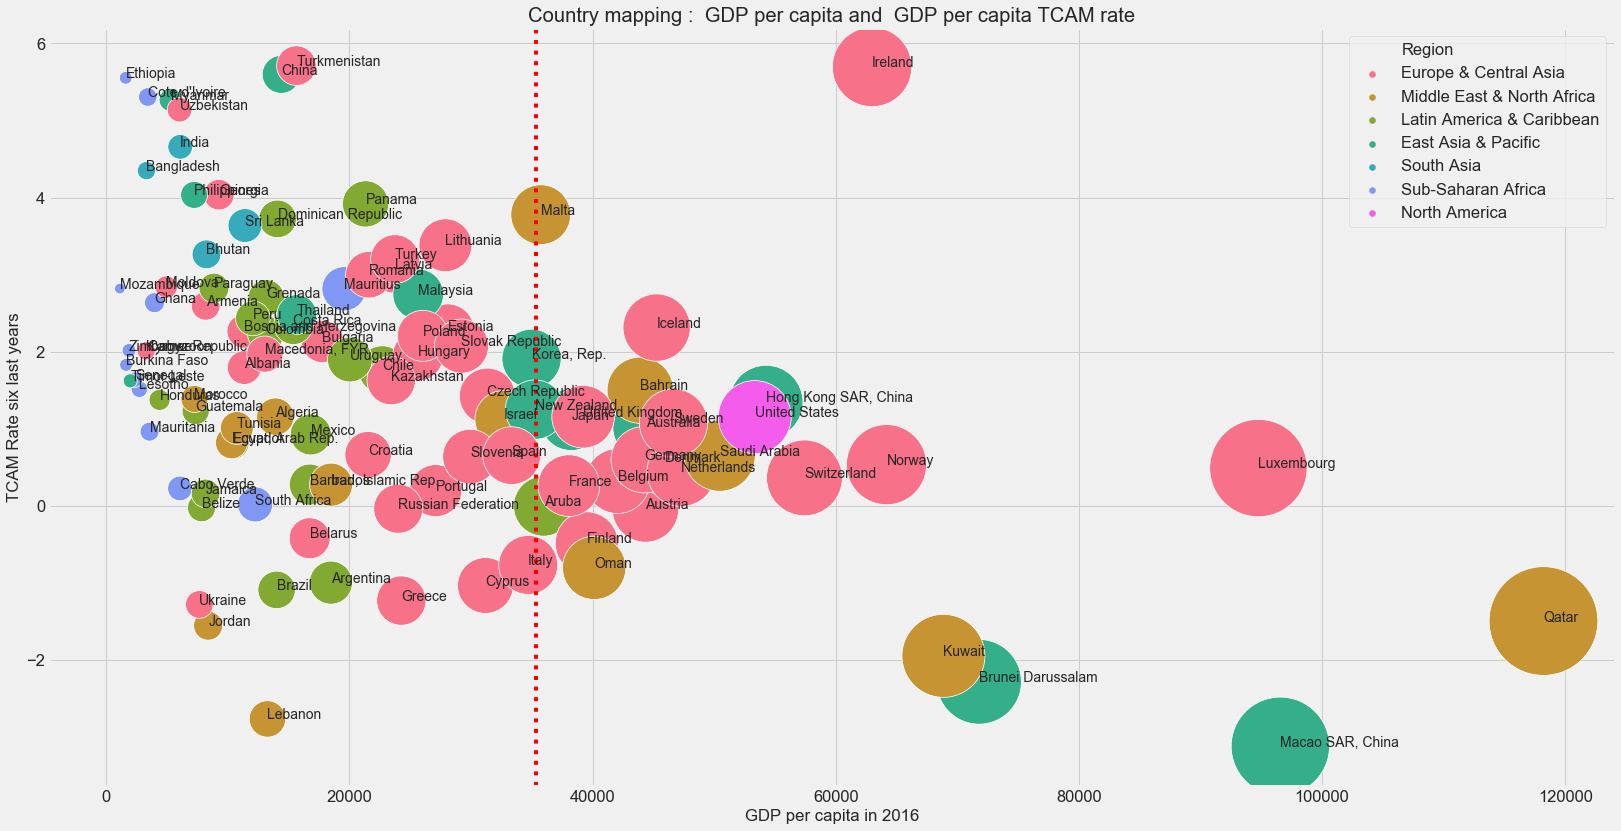

In [73]:
matplotlib.style.use('fivethirtyeight') 
ax=sns.scatterplot(x="2016", y="TCAM_Revenu_2016", hue="Region", data=revenu_master, s=revenu_master["2016"]/10)
plt.title('Country mapping :  GDP per capita and  GDP per capita TCAM rate')
plt.xlabel('GDP per capita in 2016')
plt.ylabel('TCAM Rate six last years')
plt.axvline(x=revenu_master["2016"].quantile(.75), linestyle = 'dotted', color = 'red')
for i, txt in enumerate(revenu_master["Country Name"]):
    ax.annotate(txt, (revenu_master.loc[:,"2016"].iat[i],revenu_master.loc[:,"TCAM_Revenu_2016"].iat[i]))
    
plt.savefig('RevenuCountrybyRegion.png')

In [75]:
#Choix des revenus dont les projections sur 5 ans sont supérieur à la médiane mondiale de 2016
#Raison : intégrer les pays ayant un fort de croissance annuelle mais qui ont encore un revenu peu important
last_choice2 = calc_future (revenu_master, "TCAM_Revenu_2016", "Project_Revenu")
revenu_master = revenu_master[revenu_master["Project_Revenu"]>revenu_avg_2016]
revenu_countries = revenu_master["Country Name"].tolist()
analyse_checkup(revenu_master)

#74 pays repondent au critère à l'horizon 2020 

Ce jeu de données contient 74 lignes et 12 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name       0.00
Country Code       0.00
Indicator Name     0.00
2011               0.00
2012               0.00
2013               0.00
2014               0.00
2015               0.00
2016               0.00
Region             0.00
TCAM_Revenu_2016   0.00
Project_Revenu     0.00
dtype: float64 valeurs vides


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [76]:
#Classification des pays selon les priorités pour le Revenu
# les  25% plus haut
revenuetop = revenu_master["2016"].quantile(0.75)
revenu_master["Priority_Revenu"] = np.where(revenu_master["2016"]>revenuetop , 1, 2)
revenu_master["Priority_Revenu"].value_counts().sort_values(ascending = True)


1    19
2    55
Name: Priority_Revenu, dtype: int64

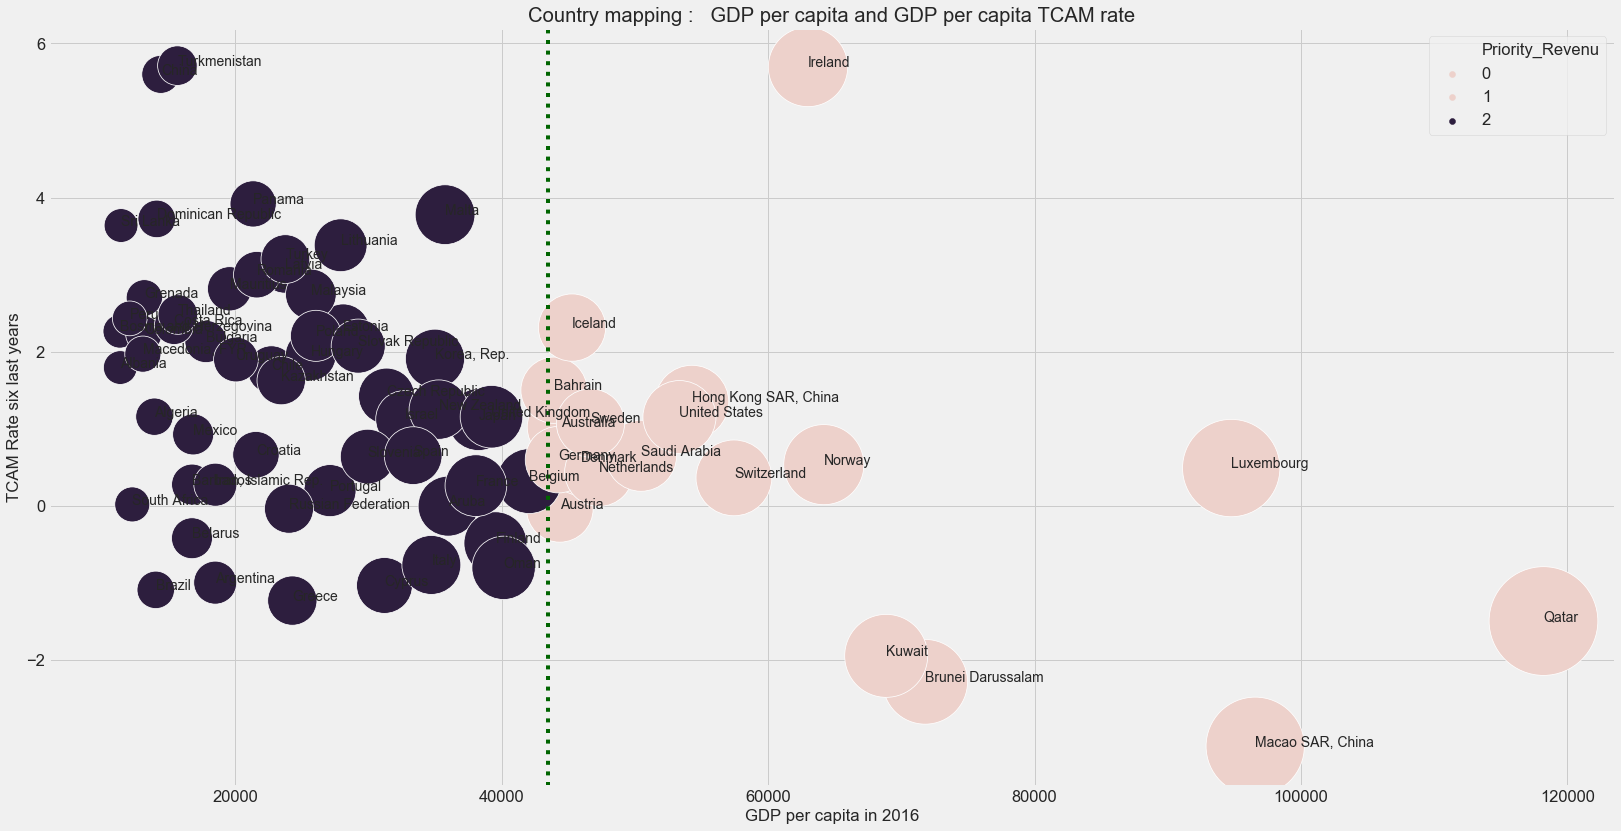

In [80]:
matplotlib.style.use('fivethirtyeight') 
ax = sns.scatterplot(x="2016", y="TCAM_Revenu_2016", hue="Priority_Revenu", data=revenu_master, s=revenu_master["2016"]/10)
plt.title('Country mapping :   GDP per capita and GDP per capita TCAM rate')
plt.xlabel('GDP per capita in 2016')
plt.ylabel('TCAM Rate six last years')
plt.axvline(x=revenu_master["2016"].quantile(.75), linestyle = 'dotted', color = 'darkgreen')
for i, txt in enumerate(revenu_master["Country Name"]):
    ax.annotate(txt, (revenu_master.loc[:,"2016"].iat[i],revenu_master.loc[:,"TCAM_Revenu_2016"].iat[i]))
    
plt.savefig('RevenuCountrybypriority.png')

In [78]:
analyse_checkup(revenu_master)

Ce jeu de données contient 74 lignes et 13 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name       0.00
Country Code       0.00
Indicator Name     0.00
2011               0.00
2012               0.00
2013               0.00
2014               0.00
2015               0.00
2016               0.00
Region             0.00
TCAM_Revenu_2016   0.00
Project_Revenu     0.00
Priority_Revenu    0.00
dtype: float64 valeurs vides


## Les inscriptions au secondaire et au supérieur 


### Secondaire 

In [81]:
data_second_enrol = g.get_group("Enrolment in secondary education, both sexes (number)")
second_enrol= data_second_enrol[data_second_enrol["Country Name"].isin(revenu_countries)]
analyse_checkup(second_enrol)
#On obtient dès ce premier traitement 84 pays.

Ce jeu de données contient 74 lignes et 10 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
2011             0.00
2012             0.00
2013             0.00
2014             0.00
2015             0.00
2016             0.00
Region           0.00
dtype: float64 valeurs vides


Text(0.5, 1.0, 'Statistiques des inscriptions au secondaire par Région')

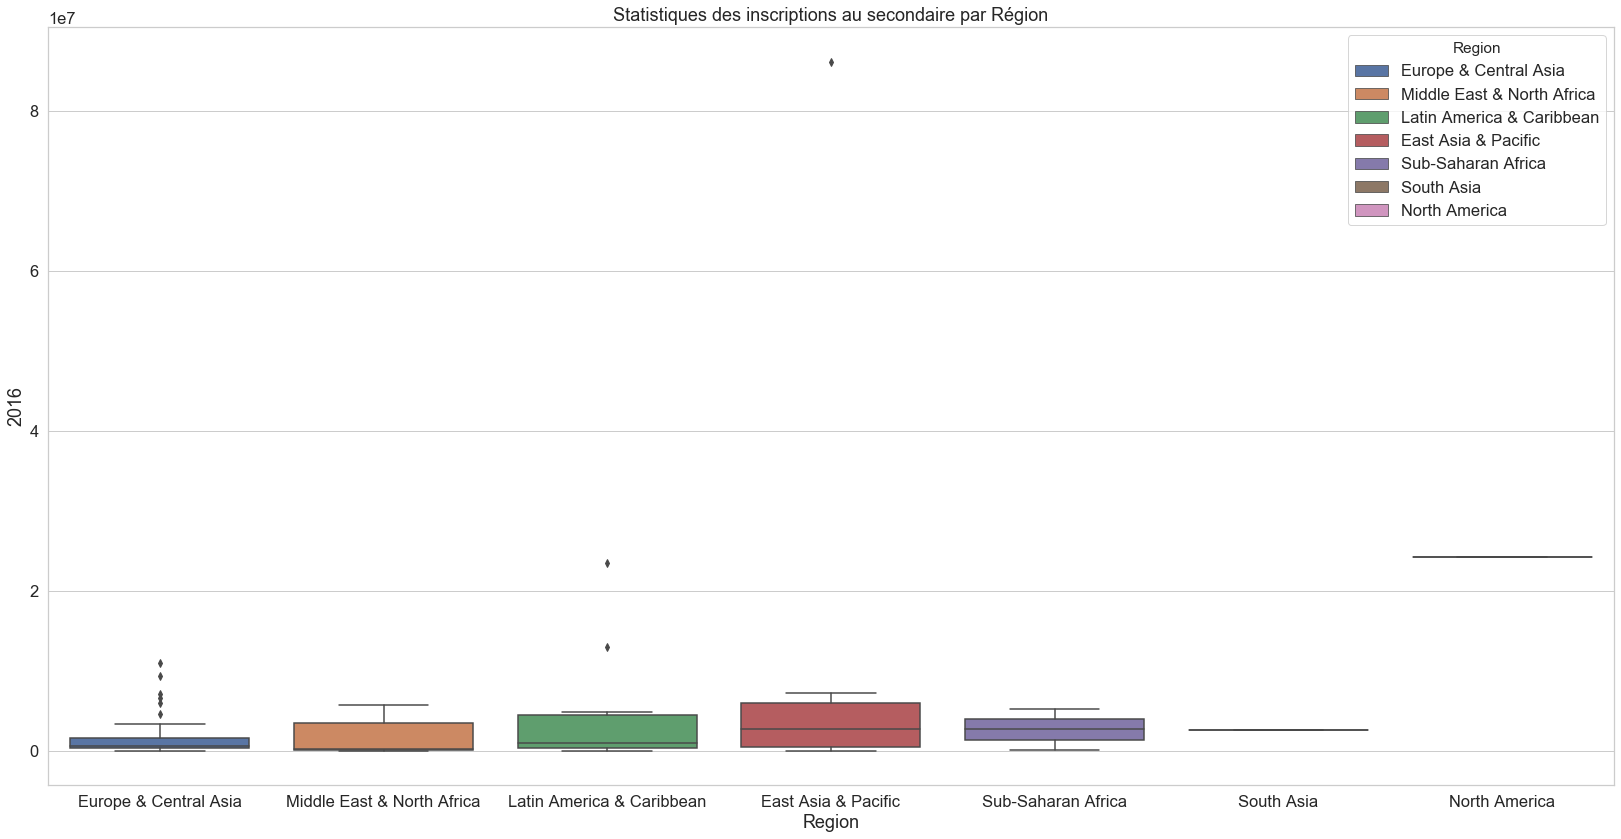

In [82]:
sns.set(rc={'figure.figsize':(25,13)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x="Region", y='2016', data = second_enrol,hue="Region",dodge=False)
plt.title("Statistiques des inscriptions au secondaire par Région")

In [83]:
#Vérification des outliers East Asia & Pacific
#Pour la région East Asia & Pacific, il apparait clairement sur la figure précédente qu'un pays semble 
#avoir des chiffres inquiétant
#Il s'agit de la Chine, vu sa population, rien de grave. On le garde 
second_enrol[second_enrol["Region"]== "East Asia & Pacific"].sort_values(by='2016', ascending = False).head(2)

Country Name Country Code  \
205  China        CHN           
485  Japan        JPN           

                                            Indicator Name          2011  \
205  Enrolment in secondary education, both sexes (number) 97,452,464.00   
485  Enrolment in secondary education, both sexes (number) 7,284,867.00    

             2012          2013          2014          2015          2016  \
205 95,004,208.00 94,324,416.00 88,691,792.00 86,127,200.00 86,127,200.00   
485 7,288,434.00  7,280,759.00  7,227,485.00  7,227,485.00  7,227,485.00    

                  Region  
205  East Asia & Pacific  
485  East Asia & Pacific

In [84]:
#Vérification des outliers Latin America & Caribbean 
#Pour la région Latin America & Caribbean, il apparait clairement sur la figure précédente que deux pays semblent 
#avoir des chiffres inquiétants
#Il s'agit du Brésil et du Mexique, vu leur démographie par rapport aux autres, rien de grave. On les garde aussi.
second_enrol[second_enrol["Region"]== "Latin America & Caribbean"].sort_values(by='2016', ascending = False).head(3)

Country Name Country Code  \
130  Brazil       BRA           
635  Mexico       MEX           
210  Colombia     COL           

                                            Indicator Name          2011  \
130  Enrolment in secondary education, both sexes (number) 23,399,408.00   
635  Enrolment in secondary education, both sexes (number) 11,836,424.00   
210  Enrolment in secondary education, both sexes (number) 5,130,778.00    

             2012          2013          2014          2015          2016  \
130 23,134,072.00 24,881,382.00 24,224,944.00 23,501,784.00 23,501,784.00   
635 12,139,246.00 12,467,278.00 12,993,322.00 12,993,322.00 12,993,322.00   
210 4,903,462.00  4,910,024.00  4,827,962.00  4,793,963.00  4,793,963.00    

                        Region  
130  Latin America & Caribbean  
635  Latin America & Caribbean  
210  Latin America & Caribbean

In [85]:
#Vérification des outliers Europe & Central Asia. On garde tous ces pays. Tout semble normal.
 
second_enrol[second_enrol["Region"]== "Europe & Central Asia"].sort_values(by='2016', ascending = False).head(15)

Country Name Country Code  \
990   Turkey              TUR           
800   Russian Federation  RUS           
360   Germany             DEU           
1025  United Kingdom      GBR           
335   France              FRA           
475   Italy               ITA           
890   Spain               ESP           
775   Poland              POL           
495   Kazakhstan          KAZ           
695   Netherlands         NLD           
795   Romania             ROU           
90    Belgium             BEL           
935   Sweden              SWE           
430   Hungary             HUN           
780   Portugal            PRT           

                                             Indicator Name         2011  \
990   Enrolment in secondary education, both sexes (number) 7,965,619.00   
800   Enrolment in secondary education, both sexes (number) 9,206,247.00   
360   Enrolment in secondary education, both sexes (number) 7,528,270.00   
1025  Enrolment in secondary education, both sexes (number) 5,000,332.00   
335   Enrolment in secondary education, both sexes (number) 5,888,388.00   
475   Enrolment in secondary education, both sexes (number) 4,630,305.00   
890   Enrolment in secondary education, both sexes (number) 3,248,018.00   
775   Enrolment in secondary education, both sexes (number) 2,726,279.00   
495   Enrolment in secondary education, both sexes (number) 1,763,841.00   
695   Enrolment in secondary education, both sexes (number) 1,538,898.00   
795   Enrolment in secondary education, both sexes (number) 1,777,771.00   
90    Enrolment in secondary education, both sexes (number) 802,659.00     
935   Enrolment in secondary education, both sexes (number) 698,968.00     
430   Enrolment in secondary education, both sexes (number) 882,609.00     
780   Enrolment in secondary education, both sexes (number) 725,804.00     

             2012          2013          2014          2015          2016  \
990  7,757,880.00 10,562,609.00 10,898,577.00 10,969,178.00 10,969,178.00   
800  9,165,252.00 9,092,027.00  9,061,324.00  9,384,610.00  9,384,610.00    
360  7,392,963.00 7,289,386.50  7,201,072.00  7,112,949.50  7,112,949.50    
1025 4,849,275.00 6,496,973.00  6,556,991.50  6,556,991.50  6,556,991.50    
335  5,920,216.00 5,913,849.00  5,947,212.00  5,947,212.00  5,947,212.00    
475  4,572,722.00 4,594,302.00  4,596,916.00  4,606,017.00  4,606,017.00    
890  3,296,129.00 3,296,359.00  3,288,424.00  3,313,127.00  3,313,127.00    
775  2,611,081.00 2,777,727.00  2,641,287.00  2,641,287.00  2,641,287.00    
495  1,718,429.00 1,658,826.00  1,661,586.00  1,679,274.00  1,713,090.00    
695  1,550,175.00 1,572,001.00  1,573,998.00  1,613,497.00  1,613,497.00    
795  1,714,307.00 1,669,005.00  1,609,259.00  1,562,960.00  1,562,960.00    
90   793,767.00   1,206,574.00  1,210,112.00  1,217,912.00  1,217,912.00    
935  675,782.00   838,671.00    826,694.00    844,107.00    844,107.00      
430  864,391.00   890,759.00    857,807.00    826,626.00    826,626.00      
780  734,003.00   798,925.00    768,631.00    778,589.00    778,589.00      

                     Region  
990   Europe & Central Asia  
800   Europe & Central Asia  
360   Europe & Central Asia  
1025  Europe & Central Asia  
335   Europe & Central Asia  
475   Europe & Central Asia  
890   Europe & Central Asia  
775   Europe & Central Asia  
495   Europe & Central Asia  
695   Europe & Central Asia  
795   Europe & Central Asia  
90    Europe & Central Asia  
935   Europe & Central Asia  
430   Europe & Central Asia  
780   Europe & Central Asia

In [86]:
#Calcul de la mediane, du TCAM secondaire 
second_avg_2016= second_enrol.loc[:,"2016"].median(axis=0)
#création d'une colonne TCAM et Calcul du taux de croissance annuel moyen 
#qui reflète la progression des pays sur les 5 dernières années
Tcam_second = calc_TCAM(second_enrol,"TCAM_Second_2016")
second_Tcam_avg = Tcam_second.median(axis=0)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [87]:
#Les pays ayant un taux d'accès supérieur à la médiane et un taux de croissance annuel supérieur à la médiane du TCAM
#Pays à maturité et toujours en croissance (Priorité 1)"TCAM_Second_2016"
secondtop = second_enrol["2016"].quantile(0.75)
second_enrol["Priority_Second"] = np.where((second_enrol["2016"]> secondtop) & 
                                           (second_enrol["TCAM_Second_2016"]> 0), 1, 2)
second_enrol["Priority_Second"].value_counts().sort_values(ascending= True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1    11
2    63
Name: Priority_Second, dtype: int64

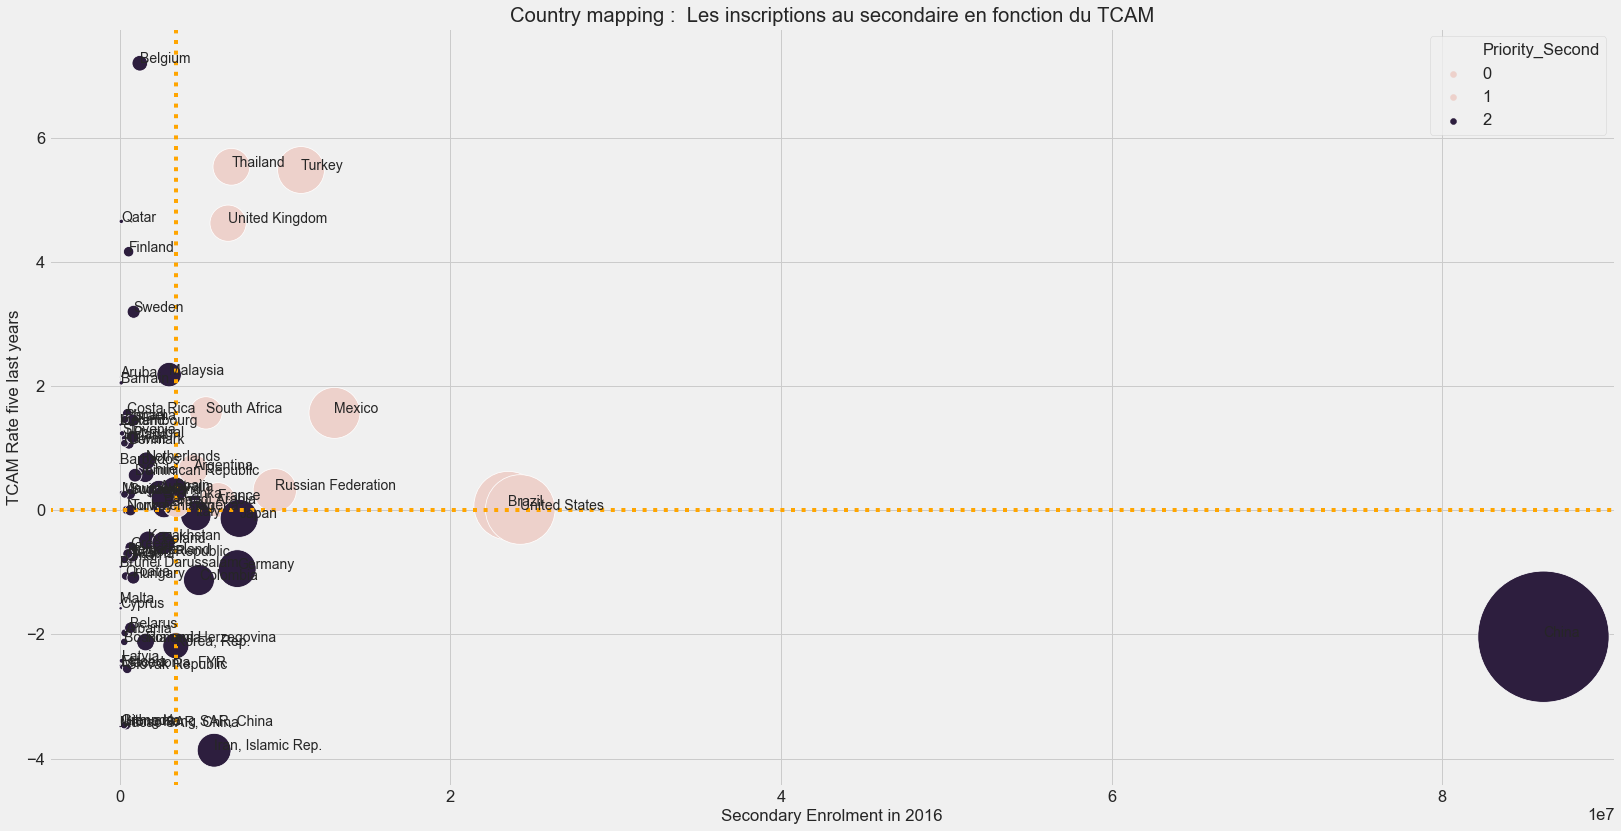

In [88]:
matplotlib.style.use('fivethirtyeight') 
ax=sns.scatterplot(x="2016", y="TCAM_Second_2016", hue="Priority_Second", data=second_enrol, s=second_enrol["2016"]/5000)
plt.title('Country mapping :  Les inscriptions au secondaire en fonction du TCAM')
plt.xlabel('Secondary Enrolment in 2016')
plt.ylabel('TCAM Rate five last years')
plt.axvline(x=secondtop, linestyle = 'dotted', color = 'orange')
plt.axhline(y=0, linestyle = 'dotted', color = 'orange')
for i, txt in enumerate(second_enrol["Country Name"]):
    ax.annotate(txt, (second_enrol.loc[:,"2016"].iat[i],second_enrol.loc[:,"TCAM_Second_2016"].iat[i]))
    
plt.savefig('SecondCountrybypriority.png')



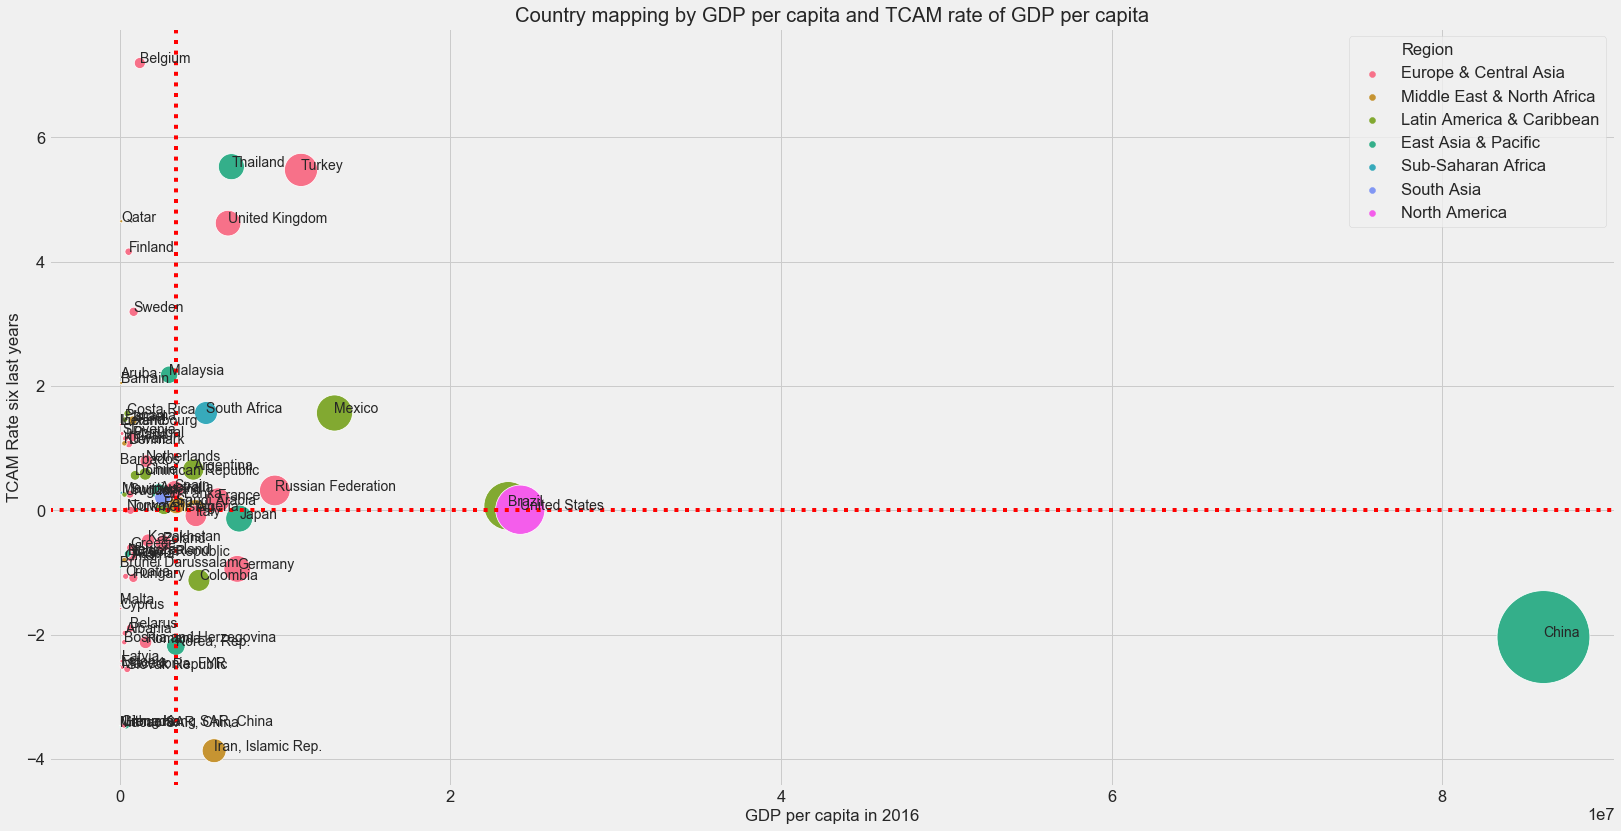

In [91]:
matplotlib.style.use('fivethirtyeight') 
ax=sns.scatterplot(x="2016", y="TCAM_Second_2016", hue="Region", data=second_enrol, s=second_enrol["2016"]/10000)
plt.title('Country mapping by GDP per capita and TCAM rate of GDP per capita')
plt.xlabel('GDP per capita in 2016')
plt.ylabel('TCAM Rate six last years')
plt.axvline(x=secondtop, linestyle = 'dotted', color = 'red')
plt.axhline(y=0, linestyle = 'dotted', color = 'red')
for i, txt in enumerate(second_enrol["Country Name"]):
    ax.annotate(txt, (second_enrol.loc[:,"2016"].iat[i],second_enrol.loc[:,"TCAM_Second_2016"].iat[i]))

In [92]:
second_country_name = second_enrol["Country Name"].tolist()
len(second_country_name)

74

### Enrollement supérieur 

In [93]:
data_tertiary_enrol = g.get_group("Enrolment in tertiary education, all programmes, both sexes (number)")
tertiary_enrol= data_tertiary_enrol[data_tertiary_enrol["Country Name"].isin(second_country_name)]
analyse_checkup(tertiary_enrol)
#On obtient dès ce premier traitement 73 pays qui rencontre le critères de filtre
#Nous continuerons notre analyse avec ces 73 pays 


Ce jeu de données contient 74 lignes et 10 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
2011             0.00
2012             0.00
2013             0.00
2014             0.00
2015             0.00
2016             0.00
Region           0.00
dtype: float64 valeurs vides


In [94]:
diffcountry1 = set(second_country_name) - set(tertiary_enrol["Country Name"].tolist())
diffcountry1
#Pays présentant des valeurs nulles sur toutes les indicateur pour une année.

set()

In [95]:
second_enrol[second_enrol["Country Name"] == "Turkmenistan"]

Country Name Country Code  \
995  Turkmenistan  TKM           

                                            Indicator Name       2011  \
995  Enrolment in secondary education, both sexes (number) 650,998.00   

          2012       2013       2014       2015       2016  \
995 650,998.00 650,998.00 650,998.00 650,998.00 650,998.00   

                    Region  TCAM_Second_2016  Priority_Second  
995  Europe & Central Asia 0.00               2

Text(0.5, 1.0, 'Statistiques des inscriptions au supérieur')

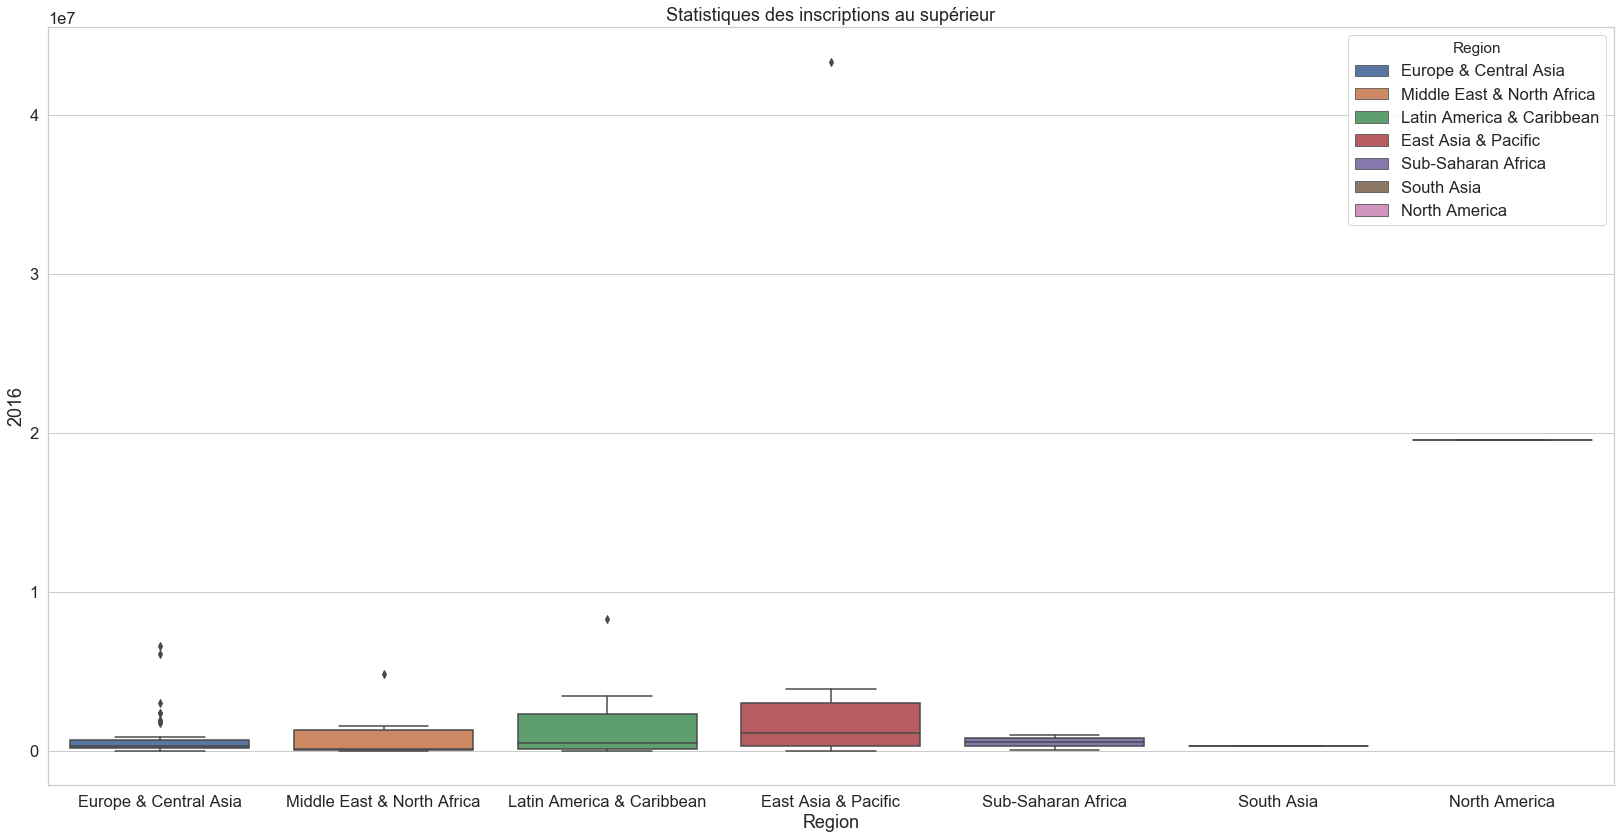

In [96]:
sns.set(rc={'figure.figsize':(25,13)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x="Region", y='2016', data = tertiary_enrol,hue="Region",dodge=False)
plt.title("Statistiques des inscriptions au supérieur")

In [97]:
#Vérification des outliers East Asia & Pacific
#Pour la région East Asia & Pacific, il apparait clairement sur la figure précédente qu'un pays semble 
#avoir des chiffres inquiétant
#Il s'agit de la Chine, vu sa population, rien de grave. On le garde 
tertiary_enrol[tertiary_enrol["Region"]== "East Asia & Pacific"].sort_values(by='2016', ascending = False).head(2)

Country Name Country Code  \
206  China        CHN           
486  Japan        JPN           

                                                           Indicator Name  \
206  Enrolment in tertiary education, all programmes, both sexes (number)   
486  Enrolment in tertiary education, all programmes, both sexes (number)   

             2011          2012          2013          2014          2015  \
206 31,308,378.00 32,585,960.00 34,091,288.00 41,924,200.00 43,367,392.00   
486 3,880,544.00  3,884,638.00  3,862,749.00  3,862,460.00  3,862,460.00    

             2016               Region  
206 43,367,392.00  East Asia & Pacific  
486 3,862,460.00   East Asia & Pacific

In [98]:
#Vérification des outliers Latin America & Caribbean 
#Pour la région Latin America & Caribbean, il apparait clairement sur la figure précédente que 1 pays semble
#avoir des chiffres inquiétants
#Il s'agit du Brésil , vu sa démographie par rapport aux autres, rien de grave. On le garde aussi.
tertiary_enrol[tertiary_enrol["Region"]== "Latin America & Caribbean"].sort_values(by='2016', ascending = False).head(2)

Country Name Country Code  \
131  Brazil       BRA           
636  Mexico       MEX           

                                                           Indicator Name  \
131  Enrolment in tertiary education, all programmes, both sexes (number)   
636  Enrolment in tertiary education, all programmes, both sexes (number)   

            2011         2012         2013         2014         2015  \
131 6,929,324.00 7,241,405.00 7,541,112.00 8,072,146.00 8,285,475.00   
636 2,981,313.00 3,161,195.00 3,300,348.00 3,419,391.00 3,419,391.00   

            2016                     Region  
131 8,285,475.00  Latin America & Caribbean  
636 3,419,391.00  Latin America & Caribbean

In [99]:
#Vérification des outliersMiddle East & North Africa
#Pour la région Latin America & Caribbean, il apparait clairement sur la figure précédente que 1 pays semble
#avoir des chiffres inquiétants
#Il s'agit de l'Iran , qui présente une importante démographie dans la Mena.
tertiary_enrol[tertiary_enrol["Region"]== "Middle East & North Africa"].sort_values(by='2016', ascending = False).head(2)

Country Name Country Code  \
451  Iran, Islamic Rep.  IRN           
826  Saudi Arabia        SAU           

                                                           Indicator Name  \
451  Enrolment in tertiary education, all programmes, both sexes (number)   
826  Enrolment in tertiary education, all programmes, both sexes (number)   

            2011         2012         2013         2014         2015  \
451 4,117,208.00 4,404,614.00 4,367,901.00 4,685,386.00 4,802,721.00   
826 1,021,288.00 1,206,007.00 1,356,602.00 1,496,730.00 1,527,769.00   

            2016                      Region  
451 4,802,721.00  Middle East & North Africa  
826 1,527,769.00  Middle East & North Africa

In [100]:
#Vérification des outliers Europe & Central Asia. On garde tous ces pays. Tout semble normal.
tertiary_enrol[tertiary_enrol["Region"]== "Europe & Central Asia"].sort_values(by='2016', ascending = False).head(10) 


Country Name Country Code  \
801   Russian Federation  RUS           
991   Turkey              TUR           
361   Germany             DEU           
336   France              FRA           
1026  United Kingdom      GBR           
891   Spain               ESP           
476   Italy               ITA           
776   Poland              POL           
696   Netherlands         NLD           
376   Greece              GRC           

                                                            Indicator Name  \
801   Enrolment in tertiary education, all programmes, both sexes (number)   
991   Enrolment in tertiary education, all programmes, both sexes (number)   
361   Enrolment in tertiary education, all programmes, both sexes (number)   
336   Enrolment in tertiary education, all programmes, both sexes (number)   
1026  Enrolment in tertiary education, all programmes, both sexes (number)   
891   Enrolment in tertiary education, all programmes, both sexes (number)   
476   Enrolment in tertiary education, all programmes, both sexes (number)   
776   Enrolment in tertiary education, all programmes, both sexes (number)   
696   Enrolment in tertiary education, all programmes, both sexes (number)   
376   Enrolment in tertiary education, all programmes, both sexes (number)   

             2011         2012         2013         2014         2015  \
801  8,652,607.00 7,983,111.00 7,528,163.00 6,995,732.00 6,592,416.00   
991  3,817,086.00 4,353,542.00 4,975,690.00 5,472,521.00 6,062,886.00   
361  2,780,012.75 2,780,012.75 2,780,012.75 2,912,203.50 2,977,781.00   
336  2,259,448.00 2,296,306.00 2,338,135.00 2,388,880.00 2,388,880.00   
1026 2,492,284.00 2,495,779.00 2,386,199.00 2,352,932.75 2,352,932.75   
891  1,950,482.00 1,965,829.00 1,969,413.00 1,982,162.00 1,963,924.00   
476  1,967,569.00 1,925,930.00 1,872,693.00 1,854,360.00 1,826,477.00   
776  2,080,334.00 2,007,212.00 1,902,718.00 1,762,666.00 1,762,666.00   
696  780,014.00   793,678.00   793,678.00   793,678.00   842,601.00     
376  660,741.00   663,698.00   659,284.00   677,429.00   677,429.00     

             2016                 Region  
801  6,592,416.00  Europe & Central Asia  
991  6,062,886.00  Europe & Central Asia  
361  2,977,781.00  Europe & Central Asia  
336  2,388,880.00  Europe & Central Asia  
1026 2,352,932.75  Europe & Central Asia  
891  1,963,924.00  Europe & Central Asia  
476  1,826,477.00  Europe & Central Asia  
776  1,762,666.00  Europe & Central Asia  
696  842,601.00    Europe & Central Asia  
376  677,429.00    Europe & Central Asia

In [101]:
#Calcul de la mediane, du TCAM supérieur 
tertiary_avg_2016= tertiary_enrol.loc[:,"2016"].median(axis=0)
#création d'une colonne TCAM et Calcul du taux de croissance annuel moyen 
#qui reflète la progression des pays sur les 5 dernières années
Tcam_tertiary = calc_TCAM(tertiary_enrol,"TCAM_Tertiary_2016")
tertiary_Tcam_avg = Tcam_second.median(axis=0)
analyse_checkup(tertiary_enrol)

Ce jeu de données contient 74 lignes et 11 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name         0.00
Country Code         0.00
Indicator Name       0.00
2011                 0.00
2012                 0.00
2013                 0.00
2014                 0.00
2015                 0.00
2016                 0.00
Region               0.00
TCAM_Tertiary_2016   0.00
dtype: float64 valeurs vides


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [102]:
#Les pays ayant un taux d'accès supérieur à la médiane et un taux de croissance annuel supérieur à la médiane du TCAM
#Pays à maturité et toujours en croissance (Priorité 1)
tert_quan=tertiary_enrol["2016"].quantile(0.75)
tertiary_enrol["Priority_Tertiary"] = np.where((tertiary_enrol["2016"]> tert_quan) & 
                                           (tertiary_enrol["TCAM_Tertiary_2016"]> 0), 1, 2)
tertiary_enrol["Priority_Tertiary"].value_counts().sort_values(ascending= True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1    11
2    63
Name: Priority_Tertiary, dtype: int64

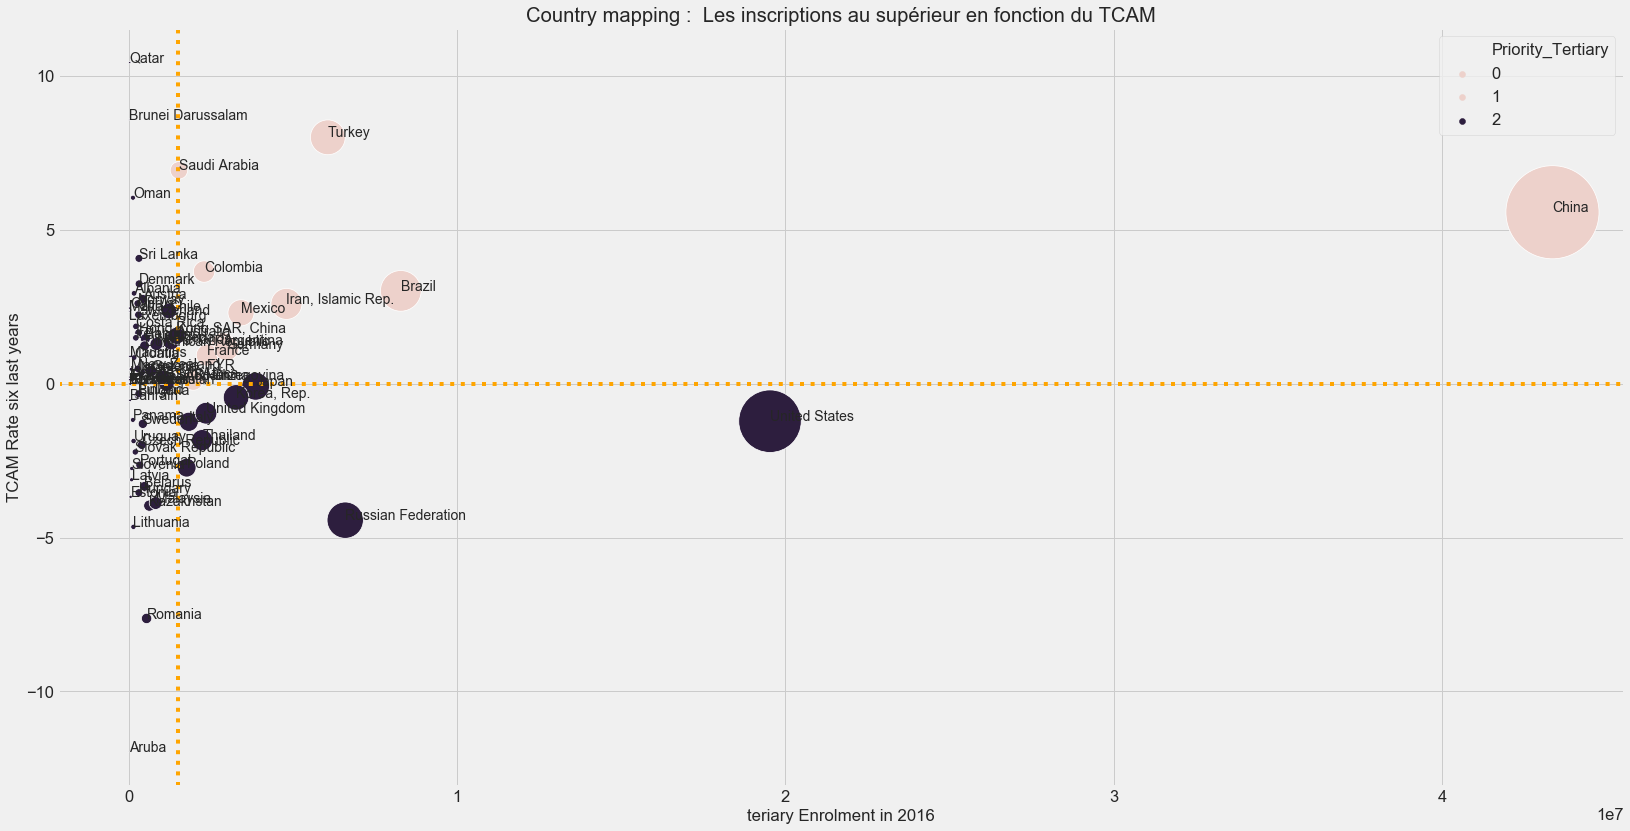

In [105]:
matplotlib.style.use('fivethirtyeight') 
ax=sns.scatterplot(x="2016", y="TCAM_Tertiary_2016", hue="Priority_Tertiary", data=tertiary_enrol, s=tertiary_enrol["2016"]/5000)
plt.title('Country mapping :  Les inscriptions au supérieur en fonction du TCAM')
plt.xlabel('teriary Enrolment in 2016')
plt.ylabel('TCAM Rate six last years')
plt.axvline(x=tert_quan, linestyle = 'dotted', color = 'orange')
plt.axhline(y=0, linestyle = 'dotted', color = 'orange')
for i, txt in enumerate(tertiary_enrol["Country Name"]):
    ax.annotate(txt, (tertiary_enrol.loc[:,"2016"].iat[i],tertiary_enrol.loc[:,"TCAM_Tertiary_2016"].iat[i]))

In [166]:
matplotlib.style.use('fivethirtyeight') 

ax = sns.scatterplot(x="2016", y="TCAM_Tertiary_2016", hue="Region", data=tertiary_enrol, s=tertiary_enrol["2016"]/5000,alpha= 0.5)
plt.title('Country mapping by GDP per capita and TCAM rate of GDP per capita')
plt.xlabel('tertiary in 2016')
plt.ylabel('TCAM Rate six last years')
plt.axvline(x=tert_quan, linestyle = 'dotted', color = 'red')
plt.axhline(y=0, linestyle = 'dotted', color = 'red')

for i, txt in enumerate(tertiary_enrol["Country Name"]):
    ax.annotate(txt, (tertiary_enrol.loc[:,"2016"].iat[i],tertiary_enrol.loc[:,"TCAM_Tertiary_2016"].iat[i]))

In [108]:
tertiary_country_name = tertiary_enrol["Country Name"].tolist()
len(tertiary_country_name)

74

### Population 

In [109]:
pop = g.get_group("Enrolment in tertiary education, all programmes, both sexes (number)")
population_data= pop[pop["Country Name"].isin(tertiary_country_name)]
analyse_checkup(population_data)

#On obtient dès ce premier traitement 73 pays qui rencontre le critères de filtre
#Nous continuerons notre analyse avec ces 73 pays 


Ce jeu de données contient 74 lignes et 10 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name     0.00
Country Code     0.00
Indicator Name   0.00
2011             0.00
2012             0.00
2013             0.00
2014             0.00
2015             0.00
2016             0.00
Region           0.00
dtype: float64 valeurs vides


Text(0.5, 1.0, 'Distribution de la population mondiale en 2016')

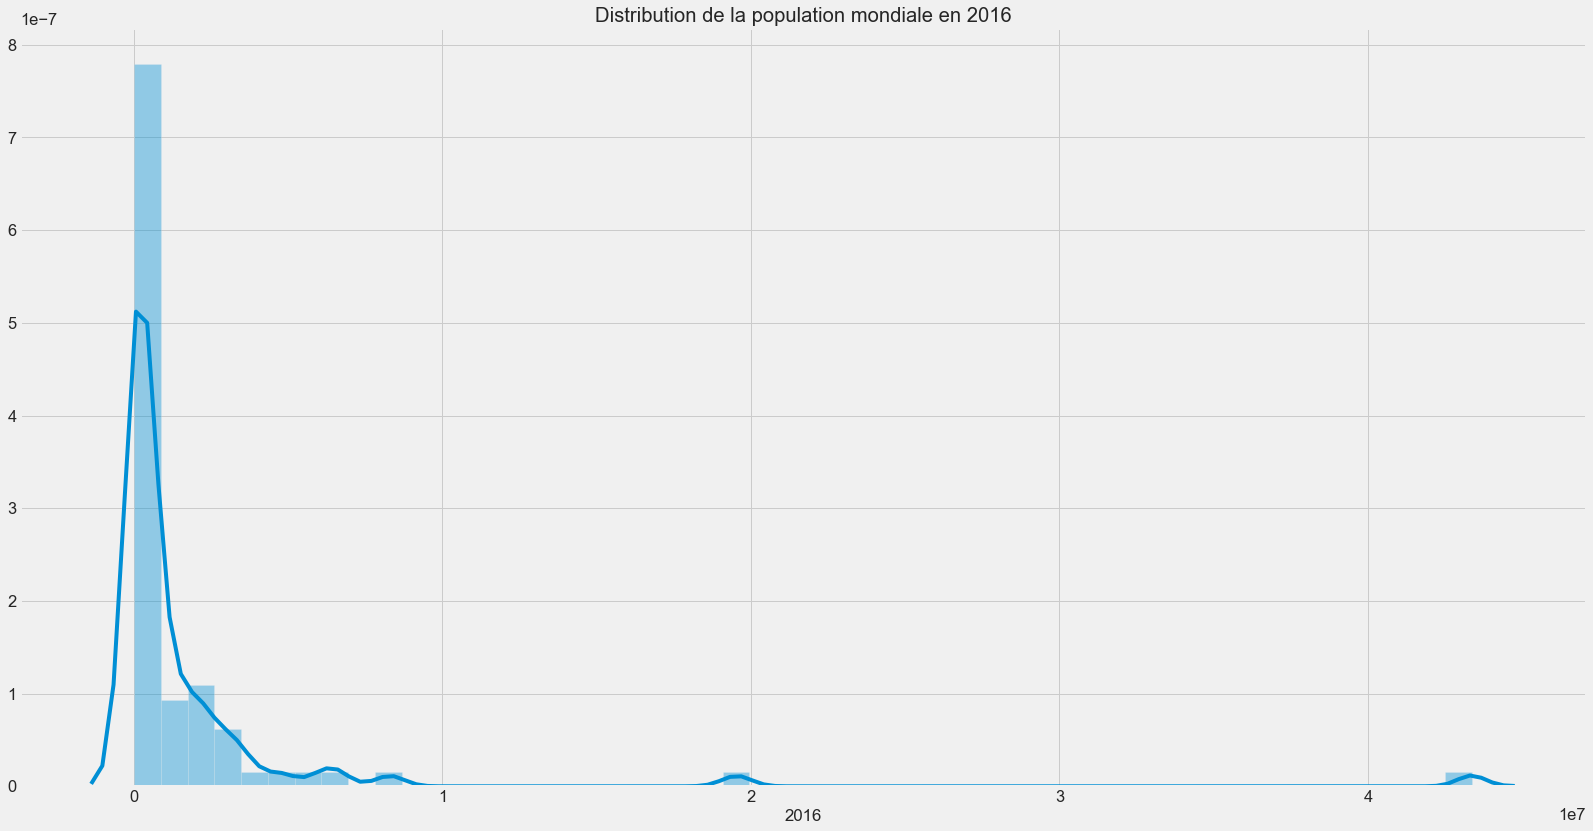

In [112]:
sns.distplot(population_data["2016"],kde=True)
plt.title("Distribution de la population mondiale en 2016")

In [113]:
Tcam_pop= calc_TCAM(population_data,"TCAM_Pop_2016")
pop_Tcam_avg = Tcam_pop.median(axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [114]:
pop_quant=population_data["2016"].quantile(0.75)
population_data["Priority_Pop"] = np.where((population_data["2016"] > pop_quant) & 
                                           (population_data["TCAM_Pop_2016"]> pop_Tcam_avg), 1, 2)
population_data["Priority_Pop"].value_counts().sort_values(ascending= True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1    10
2    64
Name: Priority_Pop, dtype: int64

## Mise en place du dataframe final

In [115]:
secondary = second_enrol.loc[:,["Country Name","2016","Priority_Second"]]
secondary.rename(columns={'2016':'Second_2016'}, inplace=True)
tertiary = tertiary_enrol.loc[:,["Country Name", "Region","2016","Priority_Tertiary"]]
tertiary.rename(columns={'2016':'Tertiary_2016'}, inplace=True)
internet = master_internet.loc[:,["Country Name","2016","Priority_Internet"]]
internet.rename(columns={'2016':'Internet_2016'}, inplace=True)
revenu = revenu_master.loc[:,["Country Name","2016","Priority_Revenu"]]
revenu.rename(columns={'2016':'Revenu_2016'}, inplace=True)
population = population_data.loc[:,["Country Name","2016","Priority_Pop"]]
population.rename(columns={'2016':'Pop_2016'}, inplace=True)

#internet
#revenu


In [116]:
data1 = pd.merge(tertiary, secondary, how ="left", on ="Country Name")
data2 = pd.merge(data1, internet, how ="left", on ="Country Name")
data3 = pd.merge(data2, revenu, how ="left", on ="Country Name")
data4 = pd.merge(data3, population, how ="left", on ="Country Name")
analyse_checkup(data4)


Ce jeu de données contient 74 lignes et 12 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name        0.00
Region              0.00
Tertiary_2016       0.00
Priority_Tertiary   0.00
Second_2016         0.00
Priority_Second     0.00
Internet_2016       0.00
Priority_Internet   0.00
Revenu_2016         0.00
Priority_Revenu     0.00
Pop_2016            0.00
Priority_Pop        0.00
dtype: float64 valeurs vides


In [117]:
data4["Priority_Sum"] = data4["Priority_Tertiary"] + data4["Priority_Second"] + data4["Priority_Internet"] + data4["Priority_Revenu"] + data4["Priority_Pop"]



In [118]:
data4["Priority"] = np.where((data4["Priority_Sum"] <=7 ), "Priority 1", "Priority 2")
data = data4.loc[:, ["Country Name", "Region","Internet_2016", 
                     "Revenu_2016", "Second_2016", "Tertiary_2016","Pop_2016","Priority_Sum", "Priority"]]
analyse_checkup(data)

Ce jeu de données contient 74 lignes et 9 colonnes,  0 lignes dupliquées
Taux de non remplissage :  
Country Name    0.00
Region          0.00
Internet_2016   0.00
Revenu_2016     0.00
Second_2016     0.00
Tertiary_2016   0.00
Pop_2016        0.00
Priority_Sum    0.00
Priority        0.00
dtype: float64 valeurs vides


In [119]:
data["Priority_Sum"].value_counts()

10    26
8     22
9     19
7     4 
6     3 
Name: Priority_Sum, dtype: int64

In [120]:
data["Priority"].value_counts().sort_values(ascending=True)

Priority 1    7 
Priority 2    67
Name: Priority, dtype: int64

In [121]:
priority1_data = data[data["Priority"]=='Priority 1']
priority1_data

Country Name                      Region  Internet_2016  Revenu_2016  \
2   Argentina     Latin America & Caribbean  70.15          18,489.43      
11  Brazil        Latin America & Caribbean  59.68          14,023.69      
25  France        Europe & Central Asia      85.62          38,058.87      
26  Germany       Europe & Central Asia      89.65          44,260.36      
48  Mexico        Latin America & Caribbean  59.54          16,832.46      
60  Saudi Arabia  Middle East & North Africa 73.75          50,458.17      
69  Turkey        Europe & Central Asia      58.35          23,756.48      

     Second_2016  Tertiary_2016     Pop_2016  Priority_Sum    Priority  
2  4,450,741.00  2,869,450.00   2,869,450.00  7             Priority 1  
11 23,501,784.00 8,285,475.00   8,285,475.00  7             Priority 1  
25 5,947,212.00  2,388,880.00   2,388,880.00  6             Priority 1  
26 7,112,949.50  2,977,781.00   2,977,781.00  6             Priority 1  
48 12,993,322.00 3,419,391.00   3,419,391.00  7             Priority 1  
60 3,419,441.00  1,527,769.00   1,527,769.00  6             Priority 1  
69 10,969,178.00 6,062,886.00   6,062,886.00  7             Priority 1

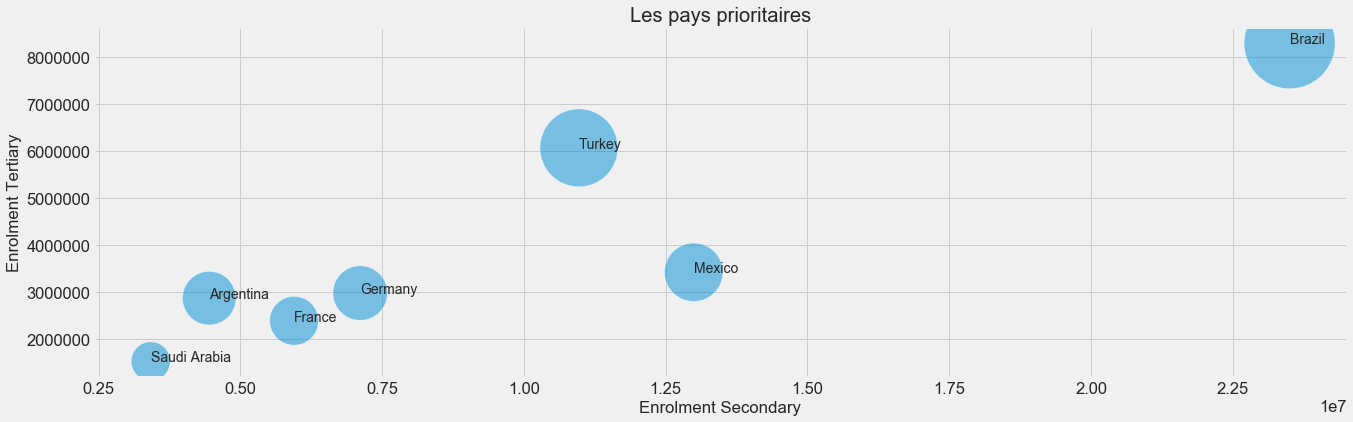

In [168]:
matplotlib.style.use('fivethirtyeight')
#sns.set(rc={'figure.figsize':(25,13)}, font_scale=1.5, style='whitegrid')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
plt.figure(figsize = (20, 6))
ax= sns.scatterplot(x="Second_2016", y="Tertiary_2016", data= priority1_data,
                    s= priority1_data["Pop_2016"]/1000, alpha= 0.5)
plt.title('Les pays prioritaires')
plt.xlabel('Enrolment Secondary')
plt.ylabel('Enrolment Tertiary')
#plt.axvline(x=tertiary_avg_2016, linestyle = 'dotted', color = 'red')
#plt.axhline(y=0, linestyle = 'dotted', color = 'red')
for i, txt in enumerate(priority1_data["Country Name"]):
    ax.annotate(txt, (priority1_data.loc[:,"Second_2016"].iat[i],
                      priority1_data.loc[:,"Tertiary_2016"].iat[i]))
    

In [145]:
prior1 = priority1_data.sort_values(by="Second_2016", ascending= False)
data.columns

Index(['Country Name', 'Region', 'Internet_2016', 'Revenu_2016', 'Second_2016',
       'Tertiary_2016', 'Pop_2016', 'Priority_Sum', 'Priority'],
      dtype='object')

Text(0.5, 1, "Présentation des données de chaque pays de priorité 1 selon l'indicateur")

<Figure size 1440x360 with 0 Axes>

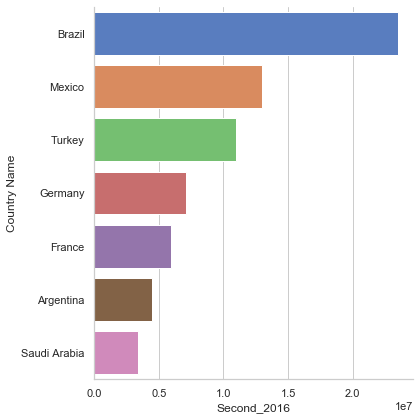

<Figure size 1440x360 with 0 Axes>

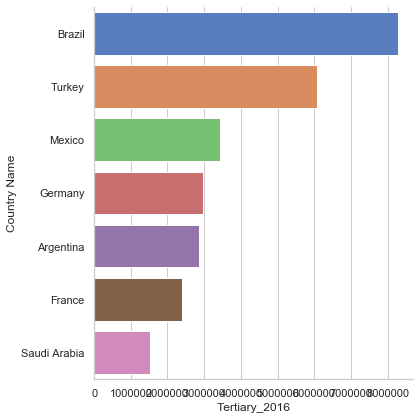

<Figure size 1440x360 with 0 Axes>

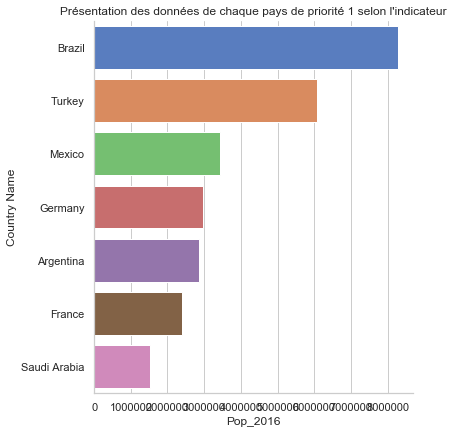

In [190]:
#show barplot of data
l_indicator = ['Second_2016','Tertiary_2016', 'Pop_2016', ]
for indic in l_indicator :
    plt.figure(figsize = (20, 5))
    prior = priority1_data.sort_values(by=indic, ascending= False)
    #matplotlib.style.use('fivethirtyeight')
    sns.set(rc={'figure.figsize':(25,13)}, font_scale=1, style='whitegrid')
    sns.catplot(x=indic, y="Country Name", data=prior,
                height=6, kind="bar", palette="muted")
    
    
plt.title('Présentation des données de chaque pays de priorité 1 selon l\'indicateur')   

## Evolution des inscriptions au secondaire pour les pays prioritaires (priorité 1)

In [293]:
countries_priority1 = priority1_data['Country Name'].tolist()
second_enrol1 = second_enrol[second_enrol["Country Name"].isin(countries_priority1)]
annee = [2017,2018,2019,2020]
for an in annee :
    an_char = str(an)
    calc_future_potential(second_enrol1, "TCAM_Second_2016",an_char, an)
    
evolution_prior1= second_enrol1.loc[:,["Country Name","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]]
evolution_prior1.set_index("Country Name",inplace= True)
result_second = evolution_prior1.transpose()
#result.reset_index()
result_second

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Country Name    Argentina        Brazil       France      Germany  \
2011         4,279,426.00 23,399,408.00 5,888,388.00 7,528,270.00   
2012         4,346,391.00 23,134,072.00 5,920,216.00 7,392,963.00   
2013         4,406,046.00 24,881,382.00 5,913,849.00 7,289,386.50   
2014         4,450,741.00 24,224,944.00 5,947,212.00 7,201,072.00   
2015         4,450,741.00 23,501,784.00 5,947,212.00 7,112,949.50   
2016         4,450,741.00 23,501,784.00 5,947,212.00 7,112,949.50   
2017         4,479,952.98 23,518,890.16 5,957,072.97 7,045,992.04   
2018         4,509,356.69 23,536,008.77 5,966,950.30 6,979,664.89   
2019         4,538,953.39 23,553,139.84 5,976,844.00 6,913,962.10   
2020         4,568,744.34 23,570,283.39 5,986,754.11 6,848,877.81   

Country Name        Mexico  Saudi Arabia        Turkey  
2011         11,836,424.00 3,400,243.00  7,965,619.00   
2012         12,139,246.00 3,400,243.00  7,757,880.00   
2013         12,467,278.00 3,400,243.00  10,562,609.00  
2014         12,993,322.00 3,419,441.00  10,898,577.00  
2015         12,993,322.00 3,419,441.00  10,969,178.00  
2016         12,993,322.00 3,419,441.00  10,969,178.00  
2017         13,196,846.01 3,422,651.19  11,569,995.13  
2018         13,403,557.97 3,425,864.39  12,203,720.95  
2019         13,613,507.81 3,429,080.61  12,872,157.97  
2020         13,826,746.25 3,432,299.85  13,577,207.43

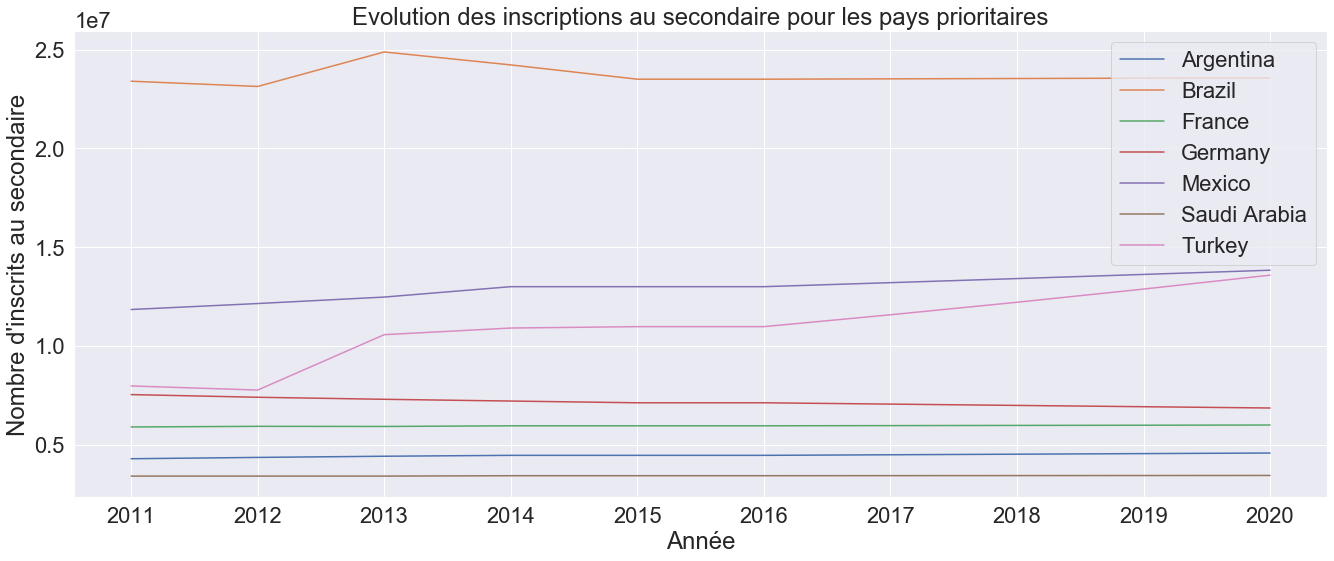

In [294]:
for nom in countries_priority1 :
    sns.set(rc={'figure.figsize':(20,8)}, font_scale=2, style='darkgrid')
    ax = sns.lineplot(x=result_second.index, y=nom, data=result_second)
    plt.legend(labels=result_second.columns, loc='upper right')
    plt.xlabel("Année")
    plt.ylabel("Nombre d'inscrits au secondaire")
    plt.title("Evolution des inscriptions au secondaire pour les pays prioritaires")
    

## Evolution des inscriptions au supérieur pour les pays prioritaires (priorité 1)

In [295]:
countries_priority1 = priority1_data['Country Name'].tolist()
tertiary_enrol1 = tertiary_enrol[tertiary_enrol["Country Name"].isin(countries_priority1)]
annee = [2017,2018,2019,2020]
for an in annee :
    an_char = str(an)
    calc_future_potential(tertiary_enrol1, "TCAM_Tertiary_2016",an_char, an)
    
evolution_prior2= tertiary_enrol1.loc[:,["Country Name","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]]
evolution_prior2.set_index("Country Name",inplace= True)
result_tertiary = evolution_prior2.transpose()
#result.reset_index()
result_tertiary

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Country Name    Argentina       Brazil       France      Germany       Mexico  \
2011         2,660,514.00 6,929,324.00 2,259,448.00 2,780,012.75 2,981,313.00   
2012         2,726,557.00 7,241,405.00 2,296,306.00 2,780,012.75 3,161,195.00   
2013         2,768,211.00 7,541,112.00 2,338,135.00 2,780,012.75 3,300,348.00   
2014         2,869,450.00 8,072,146.00 2,388,880.00 2,912,203.50 3,419,391.00   
2015         2,869,450.00 8,285,475.00 2,388,880.00 2,977,781.00 3,419,391.00   
2016         2,869,450.00 8,285,475.00 2,388,880.00 2,977,781.00 3,419,391.00   
2017         2,905,834.31 8,536,014.98 2,411,161.67 3,012,084.02 3,498,422.81   
2018         2,942,679.97 8,794,130.89 2,433,651.17 3,046,782.20 3,579,281.27   
2019         2,979,992.82 9,060,051.84 2,456,350.44 3,081,880.10 3,662,008.60   
2020         3,017,778.80 9,334,013.82 2,479,261.43 3,117,382.30 3,746,647.99   

Country Name  Saudi Arabia       Turkey  
2011         1,021,288.00  3,817,086.00  
2012         1,206,007.00  4,353,542.00  
2013         1,356,602.00  4,975,690.00  
2014         1,496,730.00  5,472,521.00  
2015         1,527,769.00  6,062,886.00  
2016         1,527,769.00  6,062,886.00  
2017         1,633,839.05  6,548,934.48  
2018         1,747,273.33  7,073,948.41  
2019         1,868,583.14  7,641,051.57  
2020         1,998,315.25  8,253,618.18

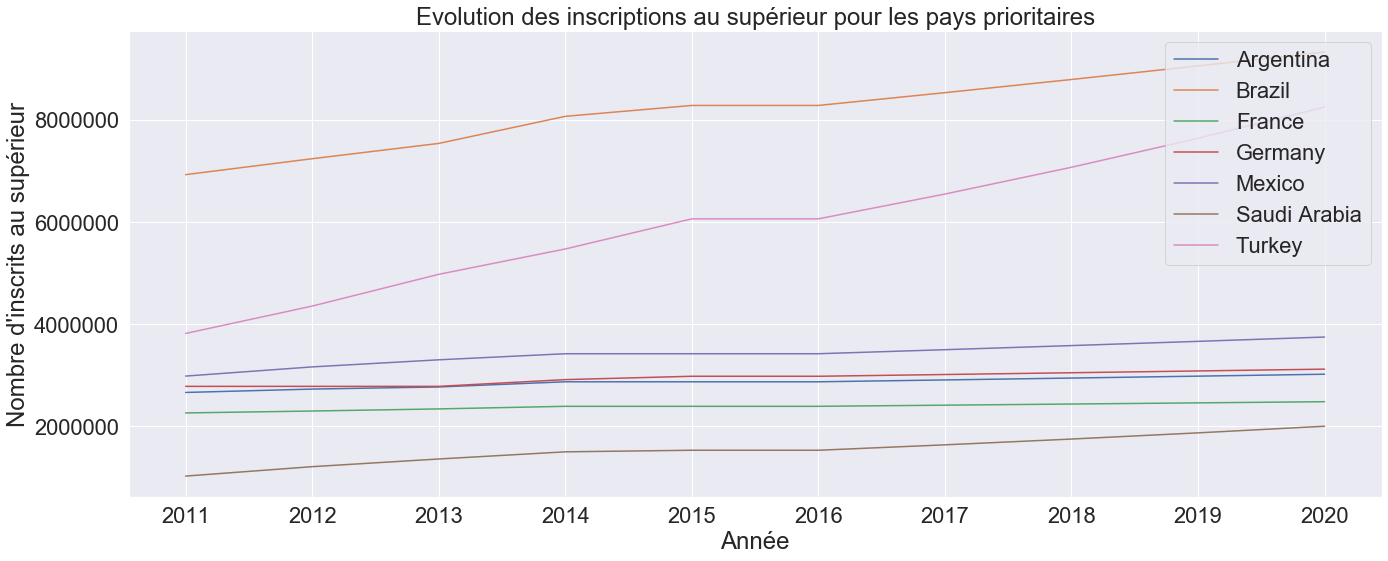

In [297]:
for nom in countries_priority1 :
    sns.set(rc={'figure.figsize':(20,8)}, font_scale=2, style='darkgrid')
    ax = sns.lineplot(x=result_tertiary.index, y=nom, data=result_tertiary)
    plt.legend(labels=result_tertiary.columns, loc='upper right')
    plt.xlabel("Année")
    plt.ylabel("Nombre d'inscrits au supérieur")
    plt.title("Evolution des inscriptions au supérieur pour les pays prioritaires")
    

# Priorité 2

In [134]:
#Les pays de niveau de priorité 2
priority2_data = data[data["Priority"]=='Priority 2']

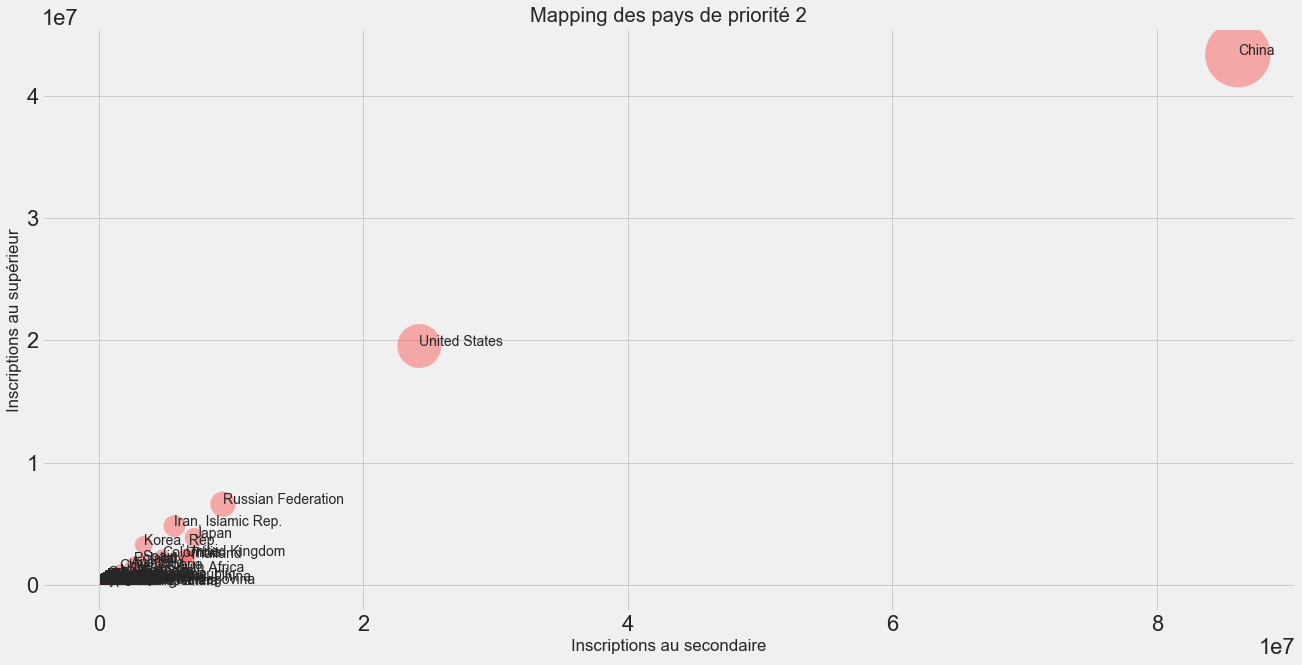

In [308]:
matplotlib.style.use('fivethirtyeight')

#sns.set(rc={'figure.figsize':(25,13)}, font_scale=1.5, style='whitegrid')
plt.figure(figsize = (20, 10))
ax= sns.scatterplot(x="Second_2016", y="Tertiary_2016", data= priority2_data,
                    s= priority2_data["Pop_2016"]/10000, alpha=0.3, color ='red')
plt.title("Mapping des pays de priorité 2")
plt.xlabel("Inscriptions au secondaire")
plt.ylabel('Inscriptions au supérieur')
#plt.axvline(x=tertiary_avg_2016, linestyle = 'dotted', color = 'red')
#plt.axhline(y=0, linestyle = 'dotted', color = 'red')
for i, txt in enumerate(priority2_data["Country Name"]):
    ax.annotate(txt, (priority2_data.loc[:,"Second_2016"].iat[i],
                      priority2_data.loc[:,"Tertiary_2016"].iat[i]))

## Notion de vague (Priorité 2 : 2 vagues)

In [299]:
priority2_data["Wave"] = np.where((priority2_data["Priority_Sum"] == 8 ), "vague 1", "vague 2")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1235]:
priority2_data["Wave"].value_counts().sort_values(ascending=True)

vague 1    23
vague 2    44
Name: Wave, dtype: int64

In [172]:
wave1 = priority2_data[priority2_data["Wave"]== "vague 1"]

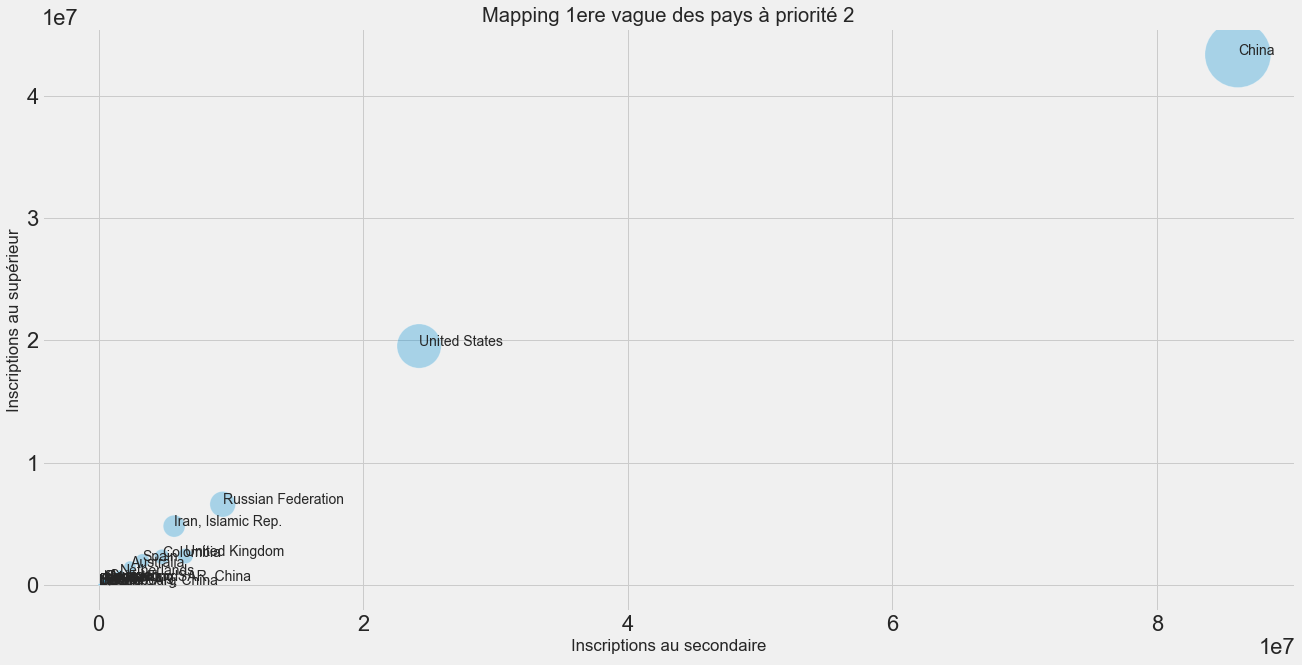

In [309]:
matplotlib.style.use('fivethirtyeight')

#sns.set(rc={'figure.figsize':(25,13)}, font_scale=1.5, style='whitegrid')
plt.figure(figsize = (20, 10))
ax= sns.scatterplot(x="Second_2016", y="Tertiary_2016", data= wave1,
                    s= wave1["Pop_2016"]/10000, alpha = 0.3)
plt.title('Mapping 1ere vague des pays à priorité 2')
plt.xlabel('Inscriptions au secondaire')
plt.ylabel('Inscriptions au supérieur')
#plt.axvline(x=tertiary_avg_2016, linestyle = 'dotted', color = 'red')
#plt.axhline(y=0, linestyle = 'dotted', color = 'red')
for i, txt in enumerate(wave1["Country Name"]):
    ax.annotate(txt, (wave1.loc[:,"Second_2016"].iat[i],
                      wave1.loc[:,"Tertiary_2016"].iat[i]))

<Figure size 1440x3600 with 0 Axes>

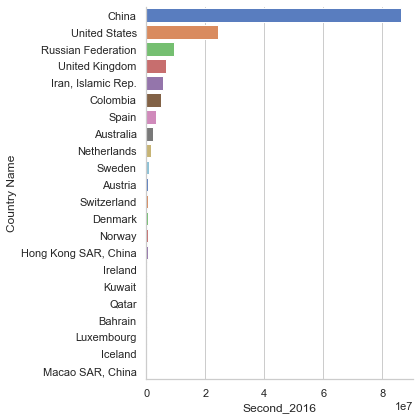

<Figure size 1440x3600 with 0 Axes>

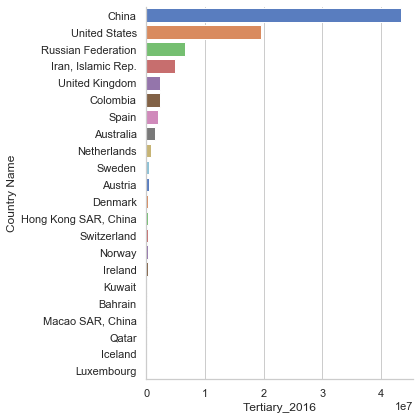

<Figure size 1440x3600 with 0 Axes>

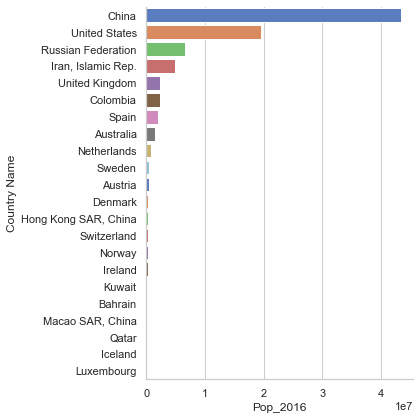

In [313]:
l_indicator = ['Second_2016','Tertiary_2016', 'Pop_2016']
for indic in l_indicator :
    prior = wave1.sort_values(by=indic, ascending= False)
    #matplotlib.style.use('fivethirtyeight')
    plt.figure(figsize = (20, 50))
    sns.set(rc={'figure.figsize':(25,13)}, font_scale=1, style='whitegrid')
    sns.catplot(x=indic, y="Country Name", data=prior,
                height=6, kind="bar", palette="muted")



In [330]:
topsecond = wave1.sort_values(by="Second_2016", ascending=False)['Country Name'].head(10).tolist()
topsuper = wave1.sort_values(by="Tertiary_2016", ascending=False)['Country Name'].head(10).tolist()
toppop =wave1.sort_values(by="Pop_2016", ascending=False)['Country Name'].head(10).tolist()

In [333]:
pays_match = set(topsecond)& set(toppop) & set(topsuper)  
pays_match

{'Australia',
 'China',
 'Colombia',
 'Iran, Islamic Rep.',
 'Netherlands',
 'Russian Federation',
 'Spain',
 'Sweden',
 'United Kingdom',
 'United States'}

## Evolution des inscriptions au secondaire pour les pays prioritaires (priorité 2)

In [338]:

second_enrol2 = second_enrol[second_enrol["Country Name"].isin(pays_match)]
annee = [2017,2018,2019,2020]
for an in annee :
    an_char = str(an)
    calc_future_potential(second_enrol2, "TCAM_Second_2016",an_char, an)
    
evolution_prior_vag21= second_enrol2.loc[:,["Country Name","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]]
evolution_prior_vag21.set_index("Country Name",inplace= True)
result_second_vague21 = evolution_prior_vag21.transpose()
#result.reset_index()
result_second_vague21

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Country Name    Australia         China     Colombia  Iran, Islamic Rep.  \
2011         2,328,350.00 97,452,464.00 5,130,778.00 7,237,005.00          
2012         2,377,328.00 95,004,208.00 4,903,462.00 7,118,357.00          
2013         2,384,025.00 94,324,416.00 4,910,024.00 5,868,528.00          
2014         2,371,284.00 88,691,792.00 4,827,962.00 5,794,537.00          
2015         2,371,284.00 86,127,200.00 4,793,963.00 5,712,478.00          
2016         2,371,284.00 86,127,200.00 4,793,963.00 5,712,478.00          
2017         2,378,516.25 84,371,980.94 4,740,017.23 5,491,641.17          
2018         2,385,770.55 82,652,532.16 4,686,678.50 5,279,341.59          
2019         2,393,046.98 80,968,124.68 4,633,939.98 5,075,249.24          
2020         2,400,345.60 79,318,044.38 4,581,794.93 4,879,046.82          

Country Name  Netherlands  Russian Federation        Spain     Sweden  \
2011         1,538,898.00 9,206,247.00        3,248,018.00 698,968.00   
2012         1,550,175.00 9,165,252.00        3,296,129.00 675,782.00   
2013         1,572,001.00 9,092,027.00        3,296,359.00 838,671.00   
2014         1,573,998.00 9,061,324.00        3,288,424.00 826,694.00   
2015         1,613,497.00 9,384,610.00        3,313,127.00 844,107.00   
2016         1,613,497.00 9,384,610.00        3,313,127.00 844,107.00   
2017         1,626,277.11 9,414,671.34        3,324,104.69 871,072.30   
2018         1,639,158.45 9,444,828.97        3,335,118.75 898,899.02   
2019         1,652,141.82 9,475,083.21        3,346,169.31 927,614.67   
2020         1,665,228.03 9,505,434.35        3,357,256.48 957,247.65   

Country Name  United Kingdom  United States  
2011         5,000,332.00    24,214,304.00   
2012         4,849,275.00    24,122,436.00   
2013         6,496,973.00    24,095,460.00   
2014         6,556,991.50    24,229,776.00   
2015         6,556,991.50    24,229,776.00   
2016         6,556,991.50    24,229,776.00   
2017         6,859,970.54    24,232,355.63   
2018         7,176,949.34    24,234,935.53   
2019         7,508,574.79    24,237,515.71   
2020         7,855,523.66    24,240,096.16

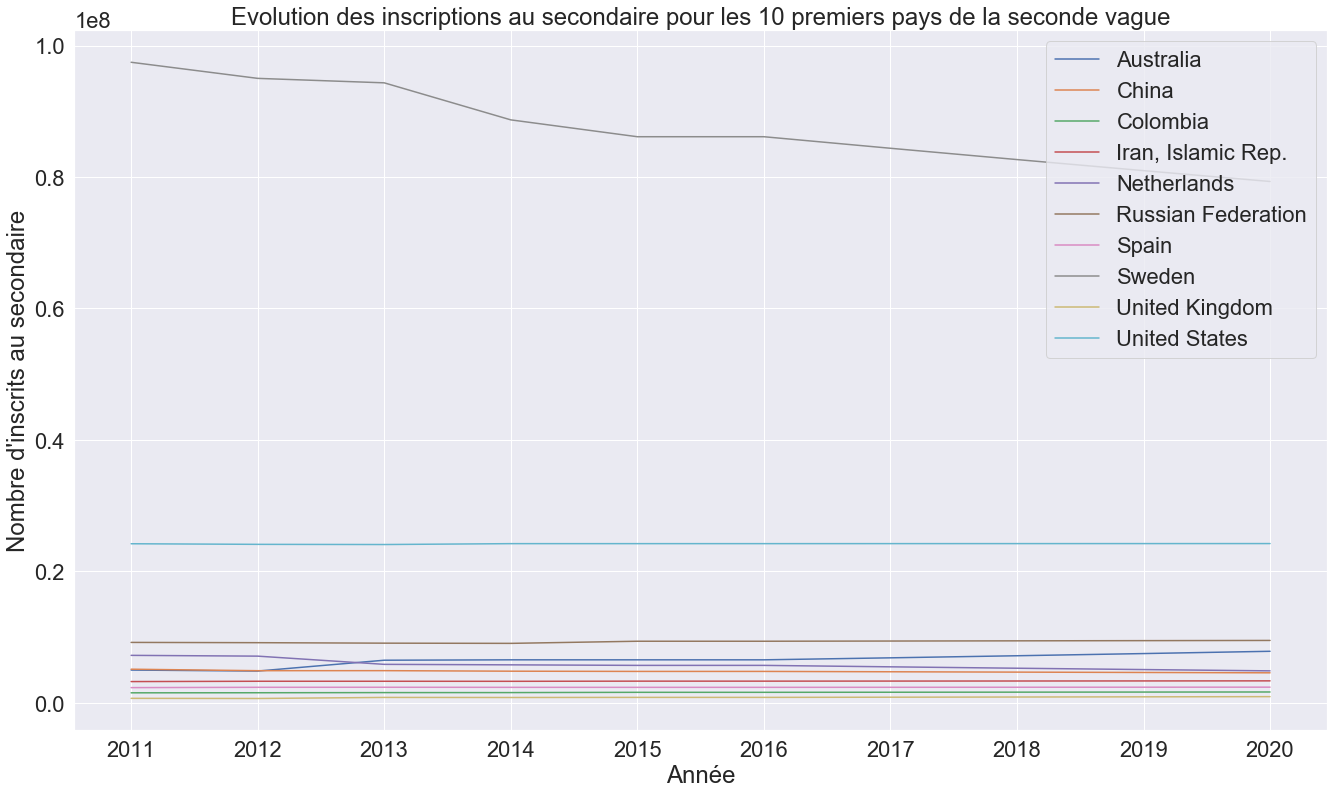

In [339]:
for nom in pays_match :
    sns.set(rc={'figure.figsize':(20,12)}, font_scale=2, style='darkgrid')
    ax = sns.lineplot(x=result_second_vague21.index, y=nom, data=result_second_vague21)
    plt.legend(labels=result_second_vague21.columns, loc='upper right')
    plt.xlabel("Année")
    plt.ylabel("Nombre d'inscrits au secondaire")
    plt.title("Evolution des inscriptions au secondaire pour les 10 premiers pays de la seconde vague")
    

## Evolution des inscriptions au supérieur pour les pays prioritaires (priorité 2)

In [340]:

tertiary_enrol2 = tertiary_enrol[tertiary_enrol["Country Name"].isin(pays_match)]
annee = [2017,2018,2019,2020]
for an in annee :
    an_char = str(an)
    calc_future_potential(tertiary_enrol2, "TCAM_Tertiary_2016",an_char, an)
    
evolution_prior_vag22= tertiary_enrol2.loc[:,["Country Name","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]]
evolution_prior_vag22.set_index("Country Name",inplace= True)
result_tertiary_vag22 = evolution_prior_vag22.transpose()
#result.reset_index()
result_tertiary_vag22

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Country Name    Australia         China     Colombia  Iran, Islamic Rep.  \
2011         1,324,257.00 31,308,378.00 1,849,466.00 4,117,208.00          
2012         1,364,203.00 32,585,960.00 1,958,429.00 4,404,614.00          
2013         1,390,478.00 34,091,288.00 2,109,224.00 4,367,901.00          
2014         1,453,521.00 41,924,200.00 2,220,652.00 4,685,386.00          
2015         1,453,521.00 43,367,392.00 2,293,550.00 4,802,721.00          
2016         1,453,521.00 43,367,392.00 2,293,550.00 4,802,721.00          
2017         1,476,259.88 45,787,517.23 2,377,306.56 4,927,592.48          
2018         1,499,354.48 48,342,697.99 2,464,121.77 5,055,710.63          
2019         1,522,810.38 51,040,471.09 2,554,107.32 5,187,159.87          
2020         1,546,633.22 53,888,793.90 2,647,379.00 5,322,026.82          

Country Name  Netherlands  Russian Federation        Spain     Sweden  \
2011         780,014.00   8,652,607.00        1,950,482.00 463,530.00   
2012         793,678.00   7,983,111.00        1,965,829.00 453,328.00   
2013         793,678.00   7,528,163.00        1,969,413.00 436,603.00   
2014         793,678.00   6,995,732.00        1,982,162.00 429,444.00   
2015         842,601.00   6,592,416.00        1,963,924.00 428,557.00   
2016         842,601.00   6,592,416.00        1,963,924.00 428,557.00   
2017         853,509.91   6,300,294.87        1,966,173.32 422,990.28   
2018         864,560.05   6,021,118.12        1,968,425.22 417,495.86   
2019         875,753.25   5,754,312.16        1,970,679.70 412,072.82   
2020         887,091.37   5,499,328.83        1,972,936.76 406,720.21   

Country Name  United Kingdom  United States  
2011         2,492,284.00    21,016,126.00   
2012         2,495,779.00    20,994,112.00   
2013         2,386,199.00    19,972,624.00   
2014         2,352,932.75    19,700,220.00   
2015         2,352,932.75    19,531,728.00   
2016         2,352,932.75    19,531,728.00   
2017         2,330,477.13    19,294,728.34   
2018         2,308,235.82    19,060,604.46   
2019         2,286,206.77    18,829,321.45   
2020         2,264,387.97    18,600,844.85

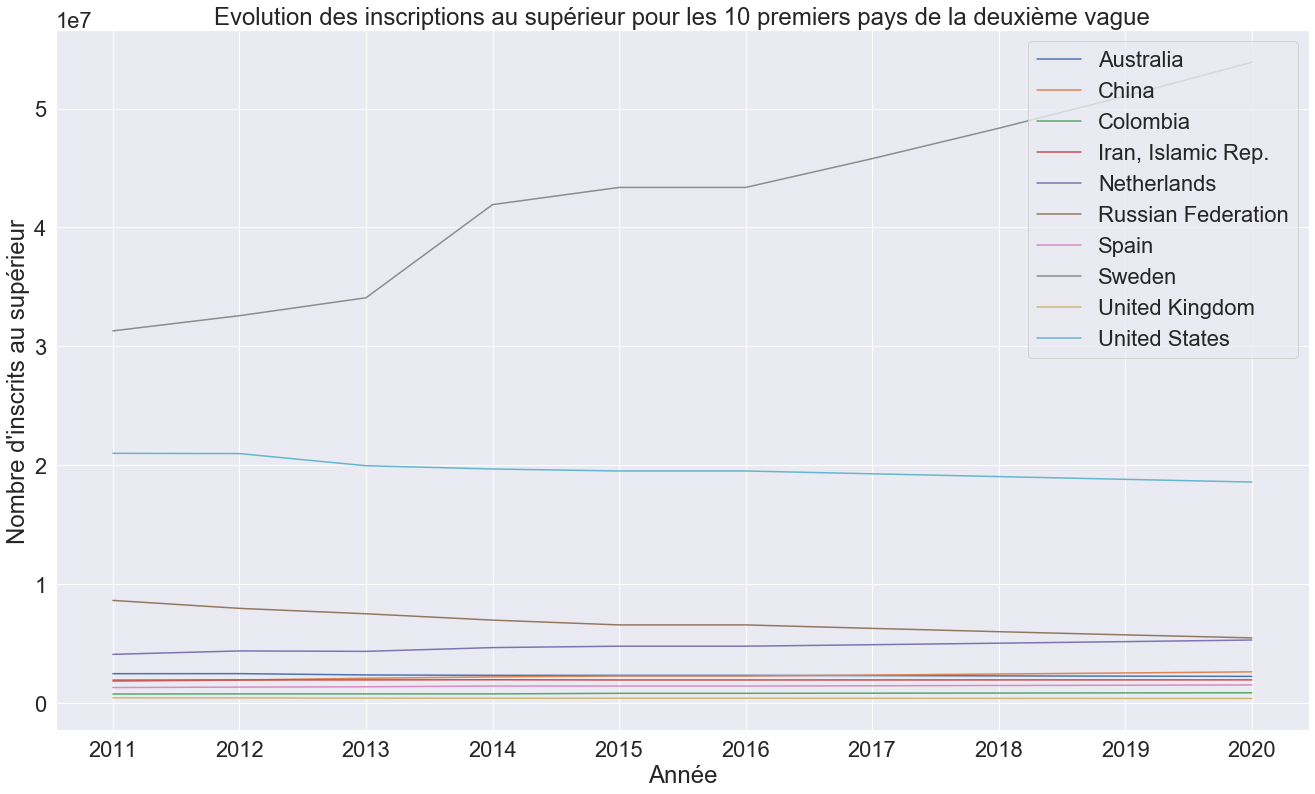

In [343]:
for nom in pays_match :
    sns.set(rc={'figure.figsize':(20,12)}, font_scale=2, style='darkgrid')
    ax = sns.lineplot(x=result_tertiary_vag22.index, y=nom, data=result_tertiary_vag22)
    plt.legend(labels=result_tertiary_vag22.columns, loc='upper right')
    plt.xlabel("Année")
    plt.ylabel("Nombre d'inscrits au supérieur")
    plt.title("Evolution des inscriptions au supérieur pour les 10 premiers pays de la deuxième vague")
    